In [71]:
import os, glob, csv, bz2, pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


from itertools import combinations
import itertools

from time import time
from matplotlib import rc

from sklearn.metrics import confusion_matrix, jaccard_score, f1_score, accuracy_score, balanced_accuracy_score

plt.rcParams['axes.facecolor'] = 'silver'

In [528]:
# This is the path to data (stract inside Sim* files)
path_to_data   = r"/Users/Guille/Desktop/extreme_scenarios/images/"
path_to_data   = r"/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/FunctionalDepthsTexas/"

path_to_images = r"/Users/Guille/Desktop/extreme_scenarios/images/depth/"
path_to_scen   = r'/Users/Guille/Desktop/extreme_scenarios/scenarios/clnSim/'
path_to_vatic  = r'/Users/Guille/Desktop/extreme_scenarios/outputs/Texas-7k/'

        
#metrics_ = ['Band Depth', 'Modified Band Depth', 'Directional Quantile', 'Extremal Depth', 'L$_\infty$ Depth', 
#            'Extreme Rank Length Depth', '$h$-Mode Depth', 'Random Tukey Depth', 'Integrated Depth', 'Random Projection Depth']

metrics_ = ['BD', 'MBD', 'DQ', 'ED', 'L$_\infty$D', 'ERLD', '$h$D', 'RTD', 'ID', 'RPD']

dates_ = ['2018-02-14', '2018-02-13', '2018-08-08', '2018-06-04', '2018-05-25',
          '2018-11-13', '2018-09-14', '2018-04-24', '2018-05-10', '2018-04-01',
          '2018-12-27', '2018-04-09', '2018-07-22', '2018-07-24', '2018-03-14',
          '2018-01-02', '2018-06-30', '2018-02-26', '2018-12-01', '2018-10-17',
          '2018-11-02', '2018-10-02', '2018-09-04', '2018-08-18', '2018-01-20']

features_ = ['Load', 'Solar Generation', 'Wind Generation', 'Renewable Energy Generation', 'Net Load']
vatic_    = ['Variable Costs', 'Load Shedding', 'Renewable Energy Curtailment', 'Reserve Shortfall']

In [528]:
# This is the path to data (stract inside Sim* files)
path_to_data   = r"/Users/Guille/Desktop/extreme_scenarios/images/"
path_to_data   = r"/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/FunctionalDepthsTexas/"

path_to_images = r"/Users/Guille/Desktop/extreme_scenarios/images/depth/"
path_to_scen   = r'/Users/Guille/Desktop/extreme_scenarios/scenarios/clnSim/'
path_to_vatic  = r'/Users/Guille/Desktop/extreme_scenarios/outputs/Texas-7k/'

        
#metrics_ = ['Band Depth', 'Modified Band Depth', 'Directional Quantile', 'Extremal Depth', 'L$_\infty$ Depth', 
#            'Extreme Rank Length Depth', '$h$-Mode Depth', 'Random Tukey Depth', 'Integrated Depth', 'Random Projection Depth']

metrics_ = ['BD', 'MBD', 'DQ', 'ED', 'L$_\infty$D', 'ERLD', '$h$D', 'RTD', 'ID', 'RPD']

dates_ = ['2018-02-14', '2018-02-13', '2018-08-08', '2018-06-04', '2018-05-25',
          '2018-11-13', '2018-09-14', '2018-04-24', '2018-05-10', '2018-04-01',
          '2018-12-27', '2018-04-09', '2018-07-22', '2018-07-24', '2018-03-14',
          '2018-01-02', '2018-06-30', '2018-02-26', '2018-12-01', '2018-10-17',
          '2018-11-02', '2018-10-02', '2018-09-04', '2018-08-18', '2018-01-20']

features_ = ['Load', 'Solar Generation', 'Wind Generation', 'Renewable Energy Generation', 'Net Load']
vatic_    = ['Variable Costs', 'Load Shedding', 'Renewable Energy Curtailment', 'Reserve Shortfall']

In [529]:
with open(path_to_data + 'ProcessedAggregatedData.pkl', 'rb') as handle:
    aggData_ = pickle.load(handle)
    
L_ = aggData_[0]
S_ = aggData_[1]
W_ = aggData_[2]
G_ = aggData_[3]
N_ = aggData_[4]
Y_ = aggData_[5]
X_ = [L_, S_, W_, G_, N_]
print(L_.shape, S_.shape, W_.shape, G_.shape, N_.shape, Y_.shape)

with open(path_to_data + 'AreaFuntionalDepths.pkl', 'rb') as handle:
    aggFunAUC_ = pickle.load(handle)

with open(path_to_data + 'DiffFuntionalDepths.pkl', 'rb') as handle:
    aggFunDiff_ = pickle.load(handle)
print(aggFunAUC_.shape, aggFunDiff_.shape)

N_metrics, N_features, N_days, N_scenarios = aggFunAUC_.shape
print(N_metrics, N_features, N_days, N_scenarios)

idx_plot_ = []
for i in range(2):
    for j in range(5):
        idx_plot_.append((i, j))

idx_dates_ = np.argsort(dates_)
dates_     = np.array(dates_)[idx_dates_]
print(dates_)

(1000, 24, 25) (1000, 24, 25) (1000, 24, 25) (1000, 24, 25) (1000, 24, 25) (1000, 4, 25)
(10, 5, 25, 1000) (10, 5, 25, 1000)
10 5 25 1000
['2018-01-02' '2018-01-20' '2018-02-13' '2018-02-14' '2018-02-26'
 '2018-03-14' '2018-04-01' '2018-04-09' '2018-04-24' '2018-05-10'
 '2018-05-25' '2018-06-04' '2018-06-30' '2018-07-22' '2018-07-24'
 '2018-08-08' '2018-08-18' '2018-09-04' '2018-09-14' '2018-10-02'
 '2018-10-17' '2018-11-02' '2018-11-13' '2018-12-01' '2018-12-27']


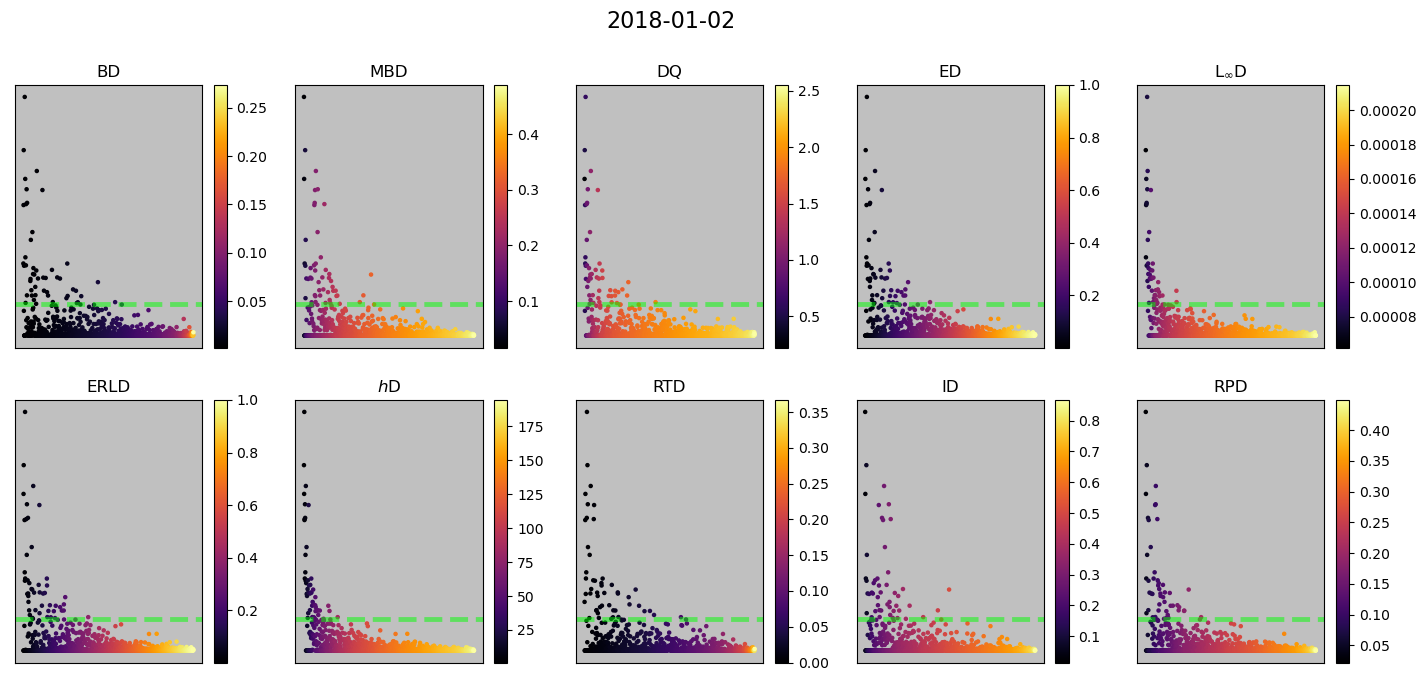

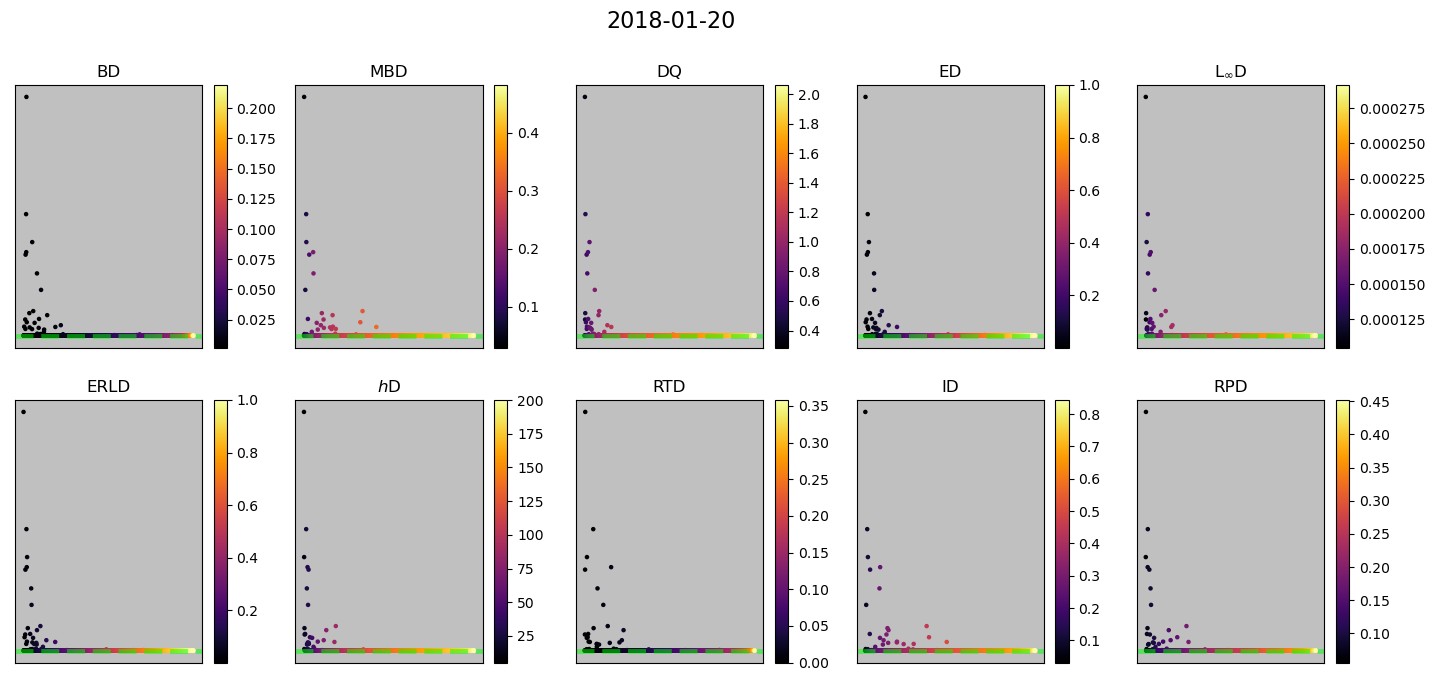

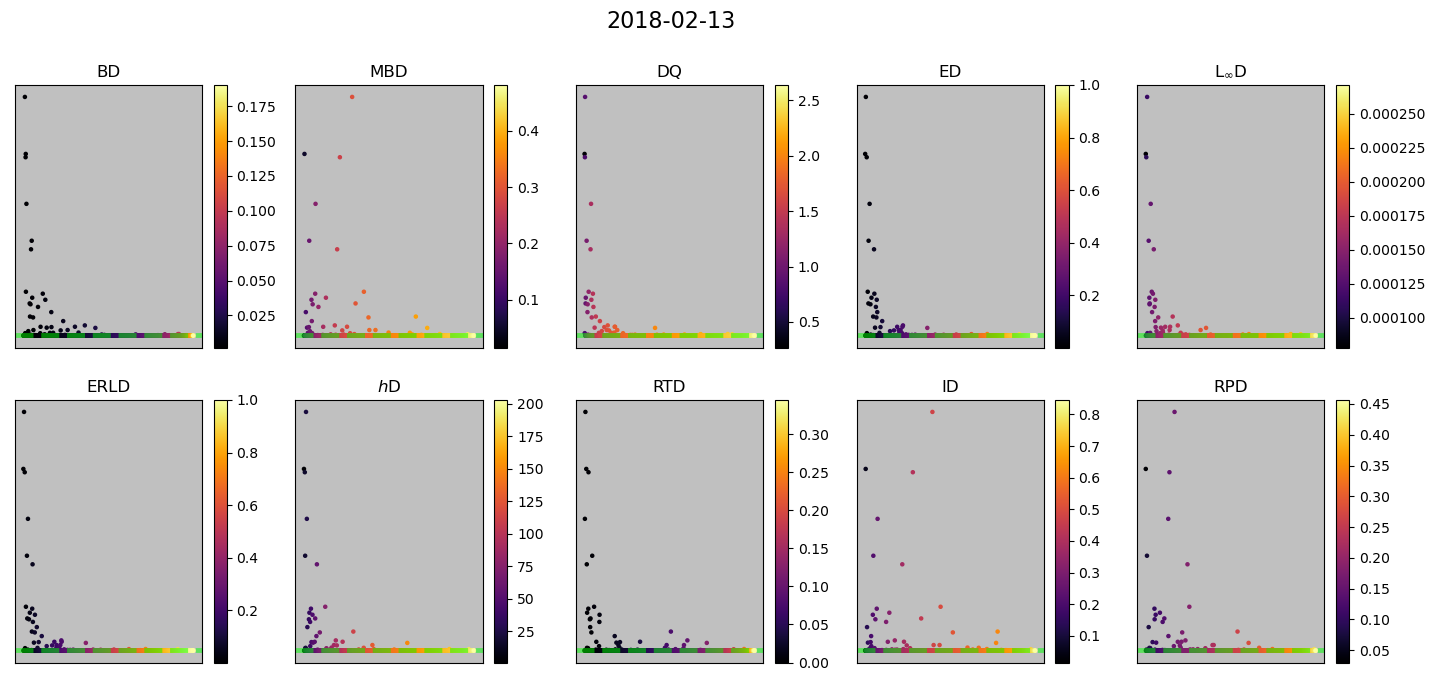

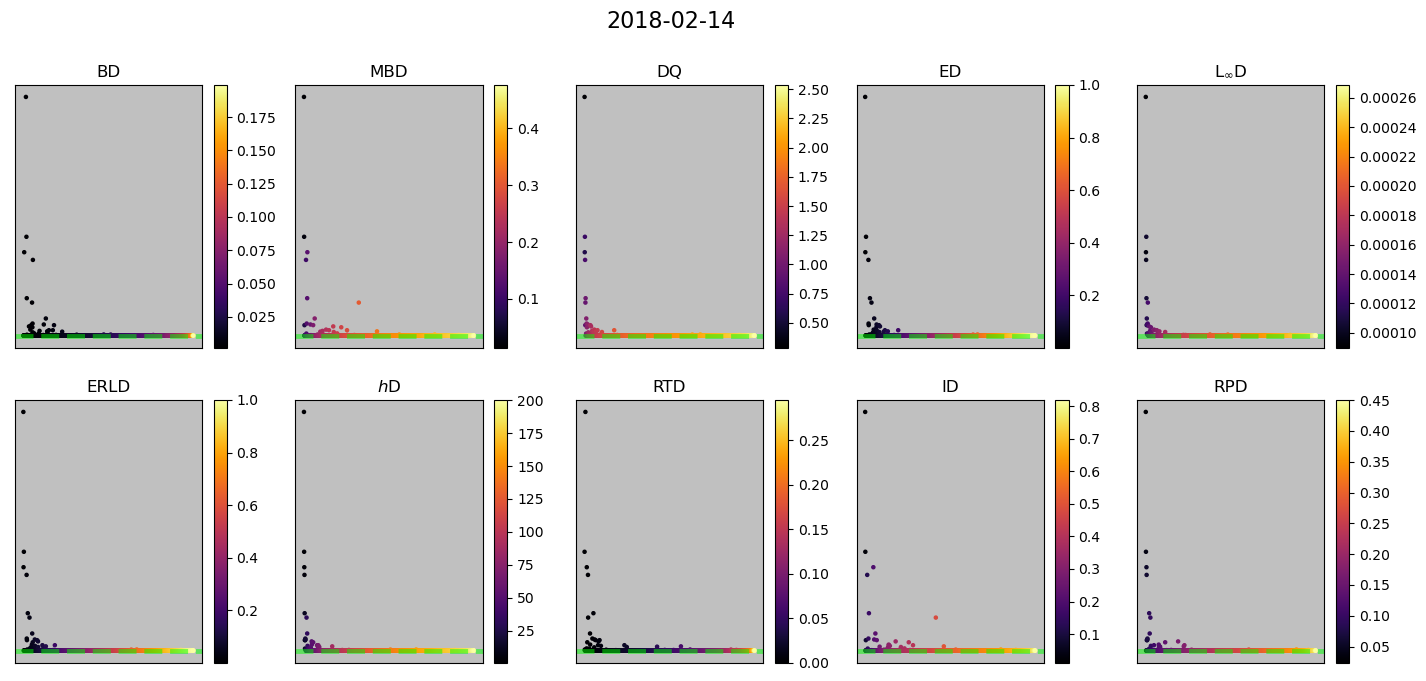

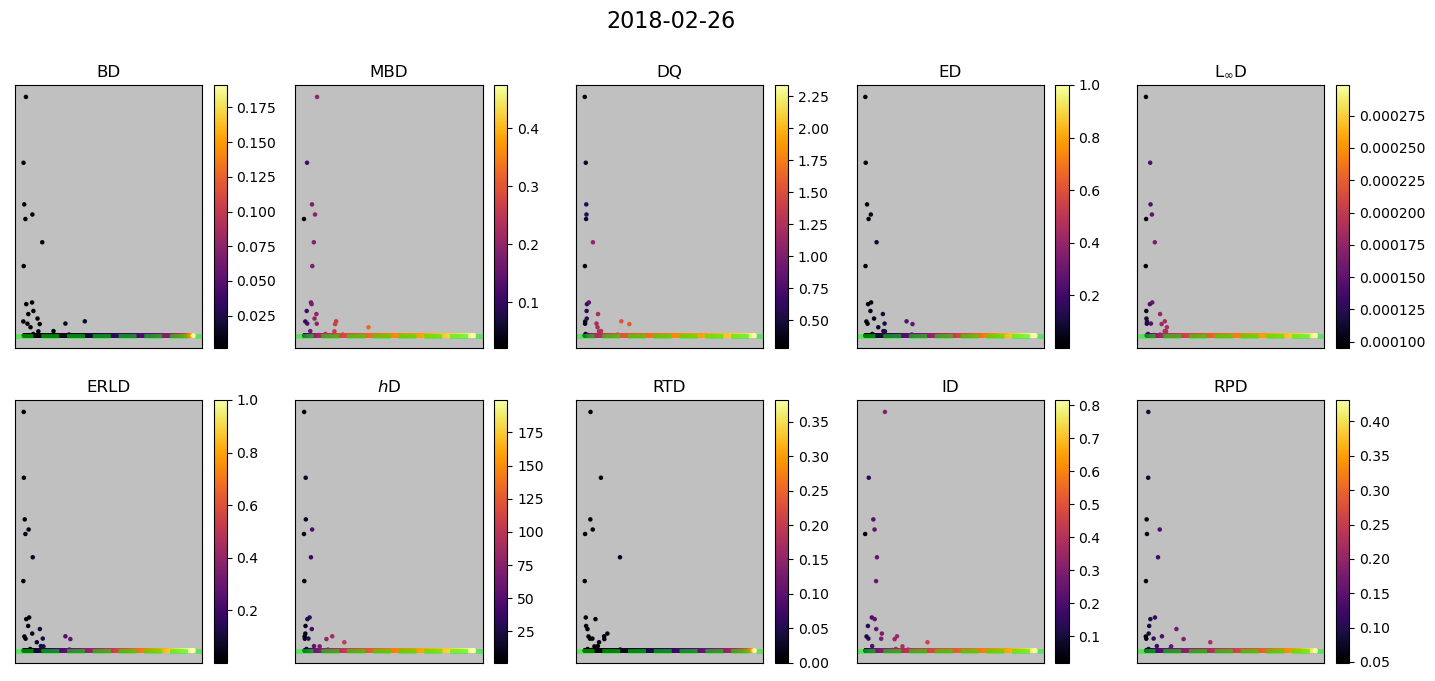

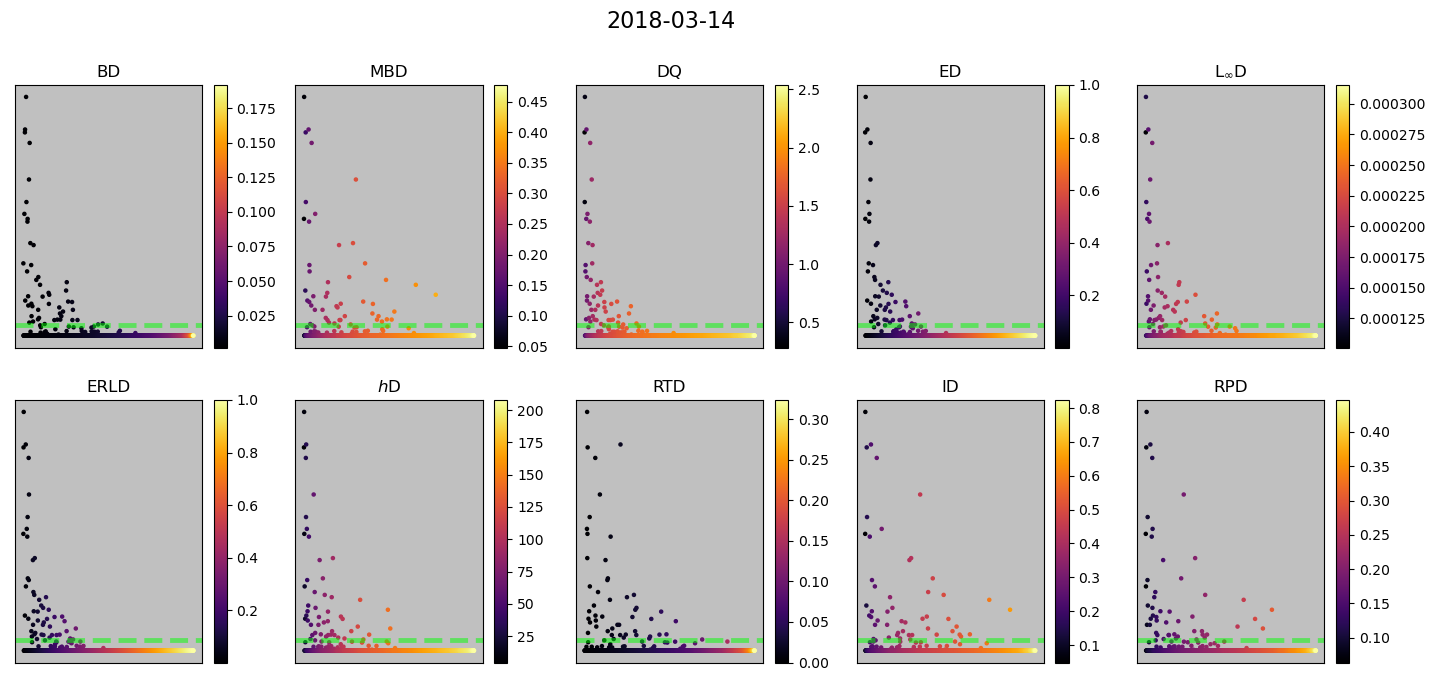

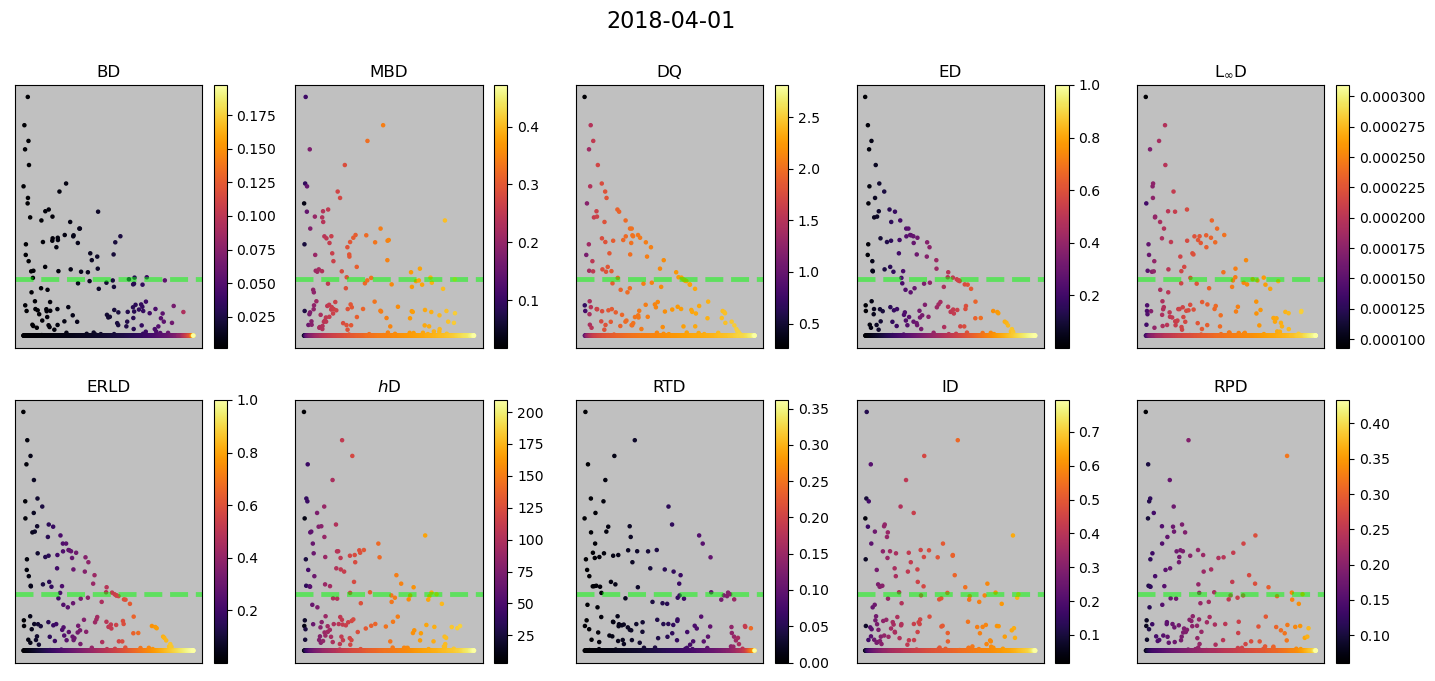

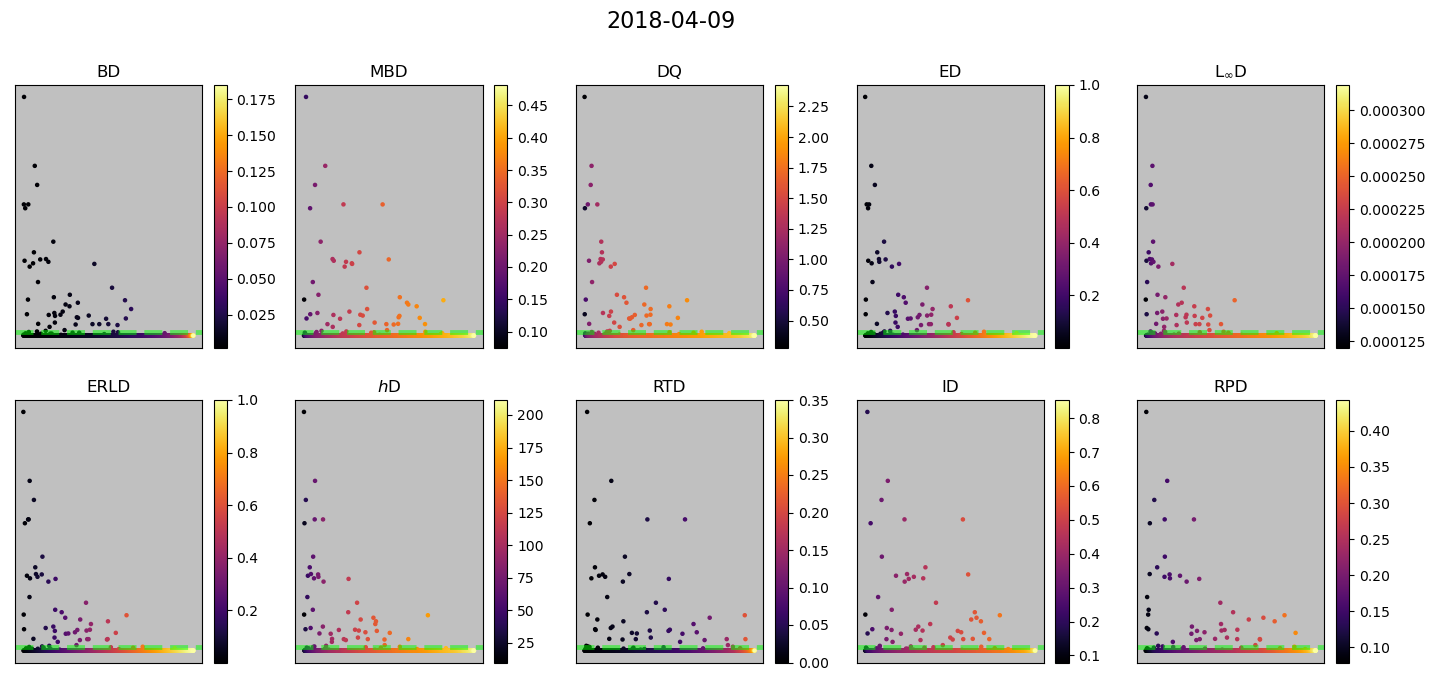

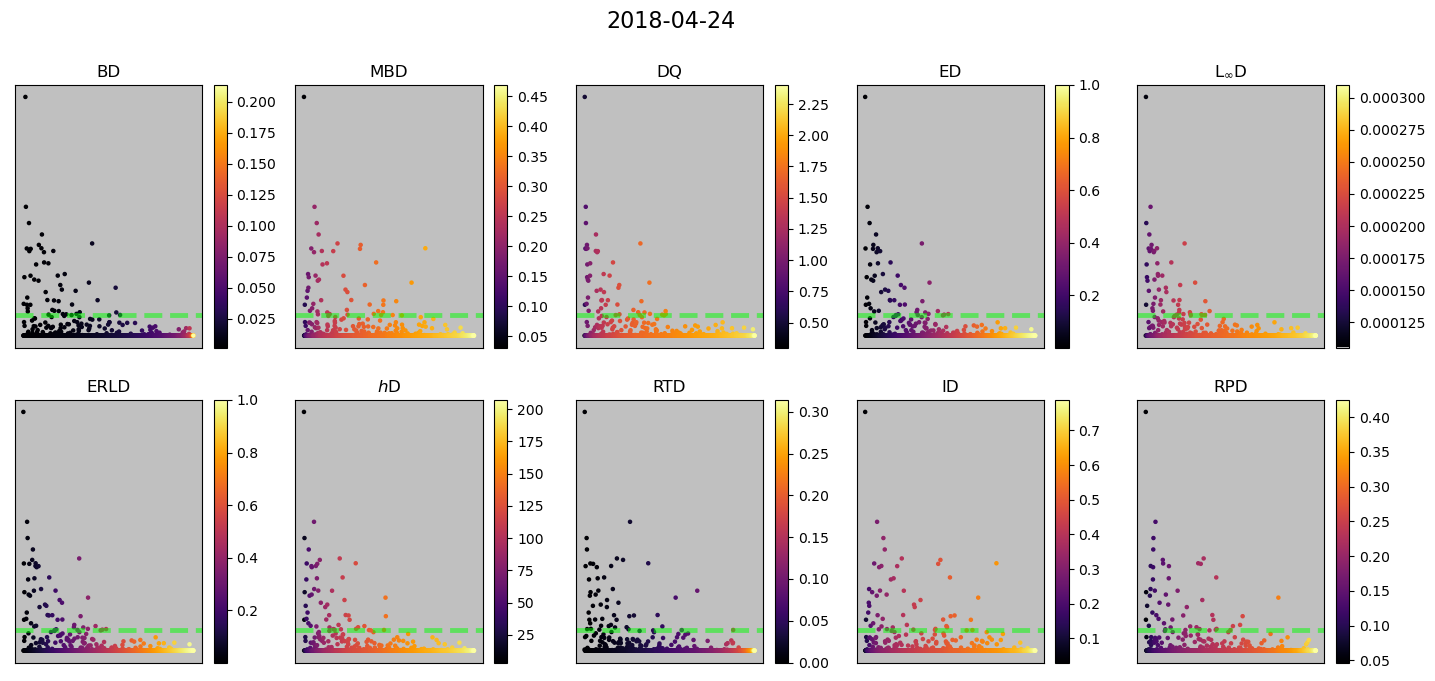

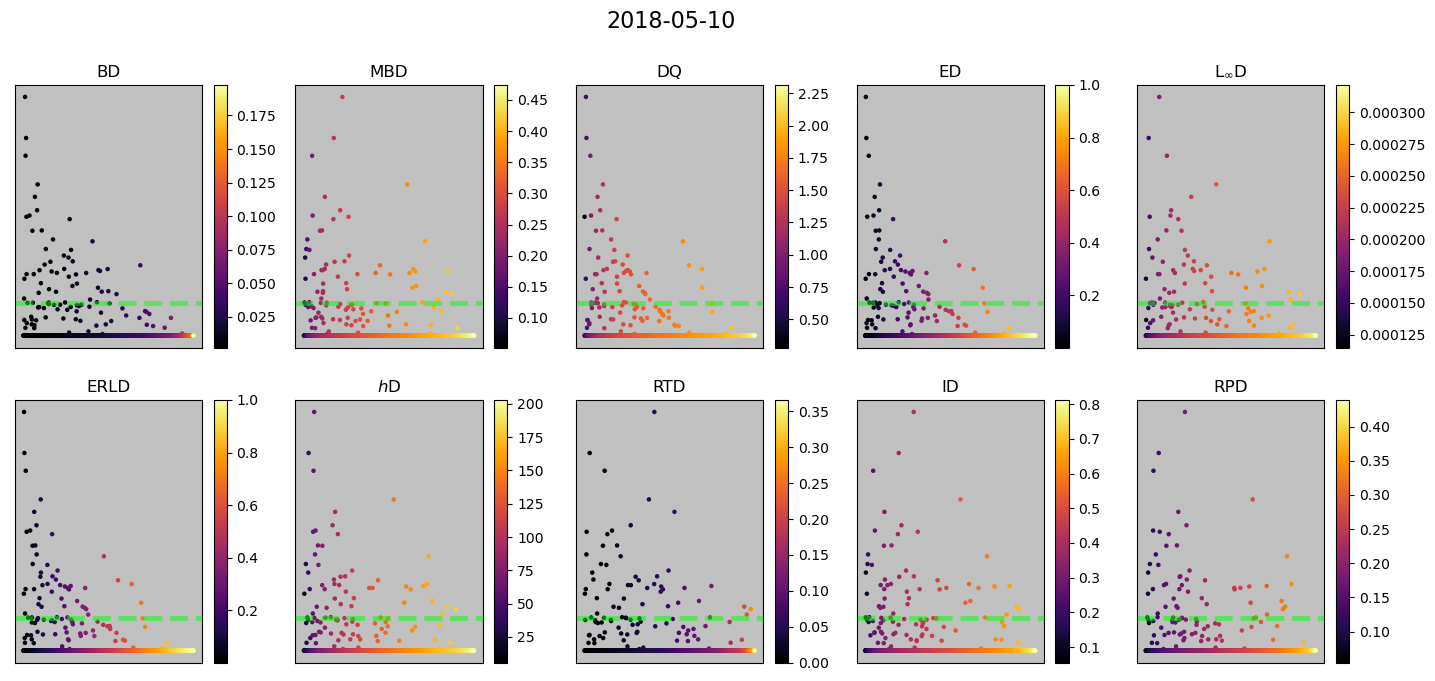

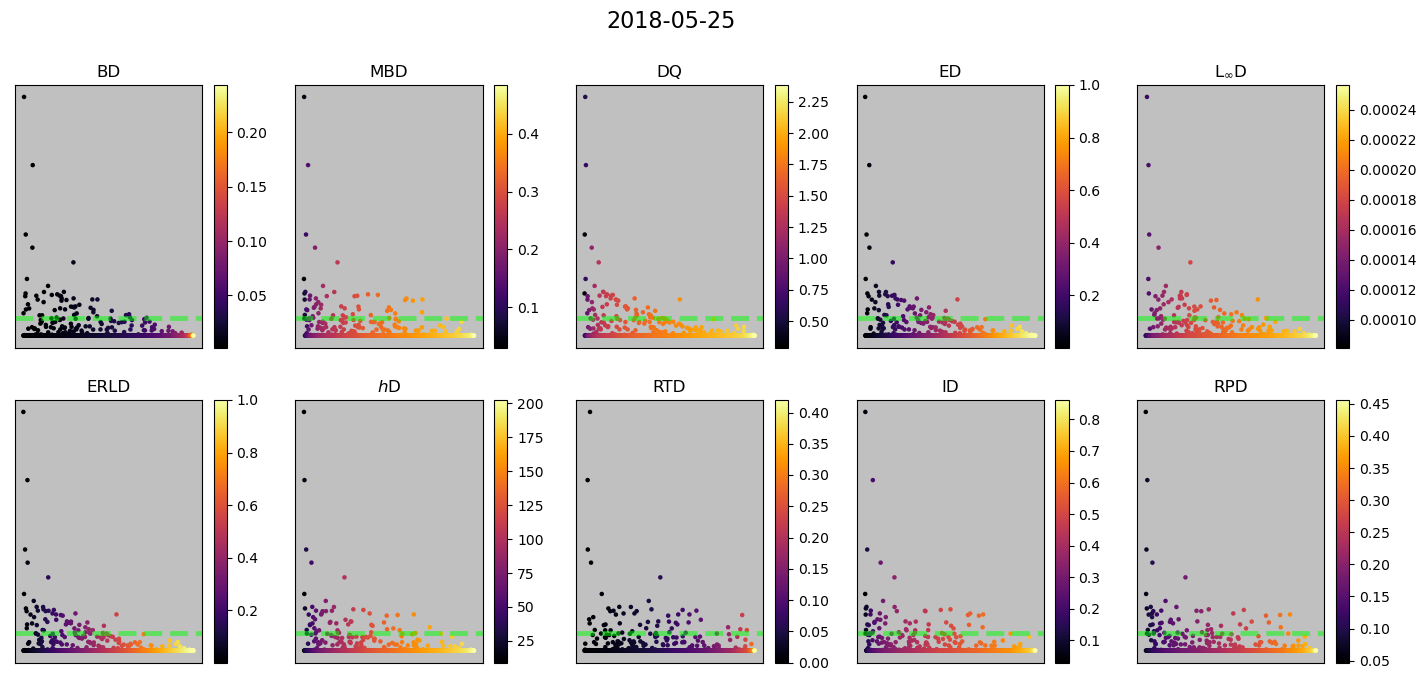

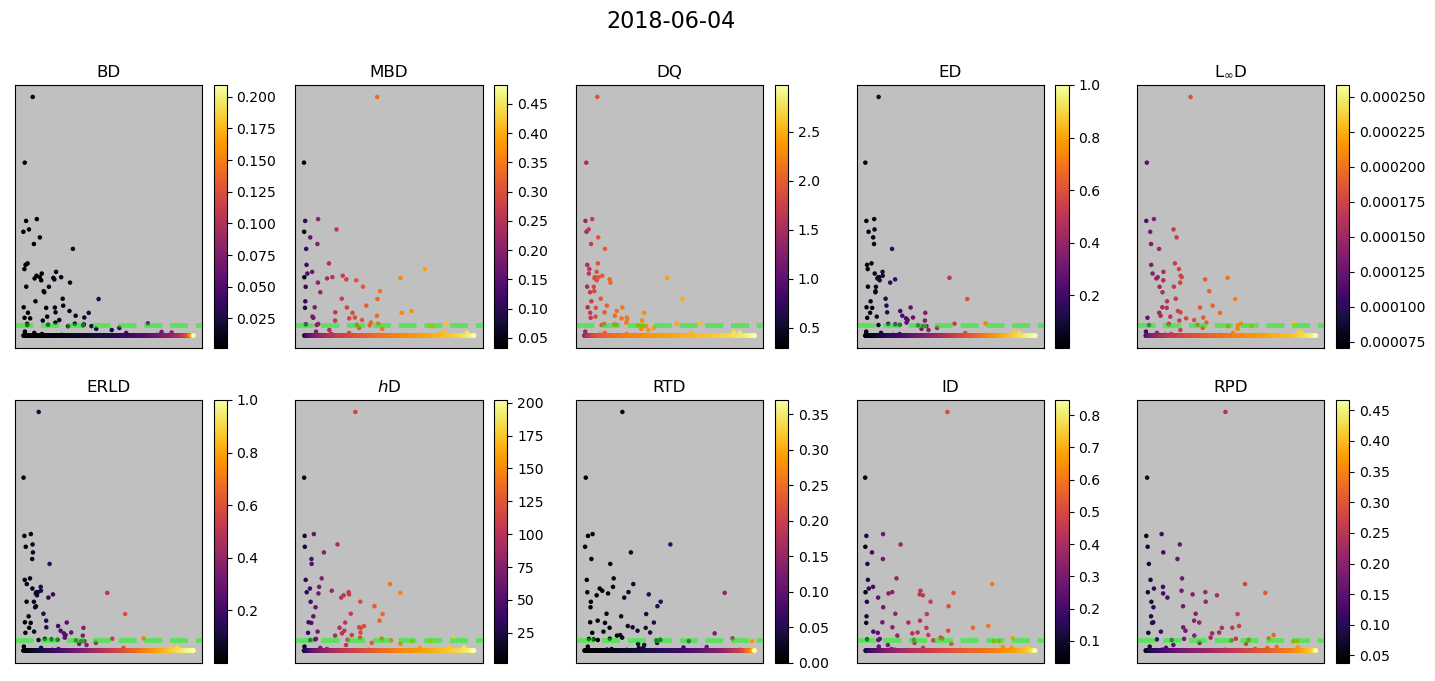

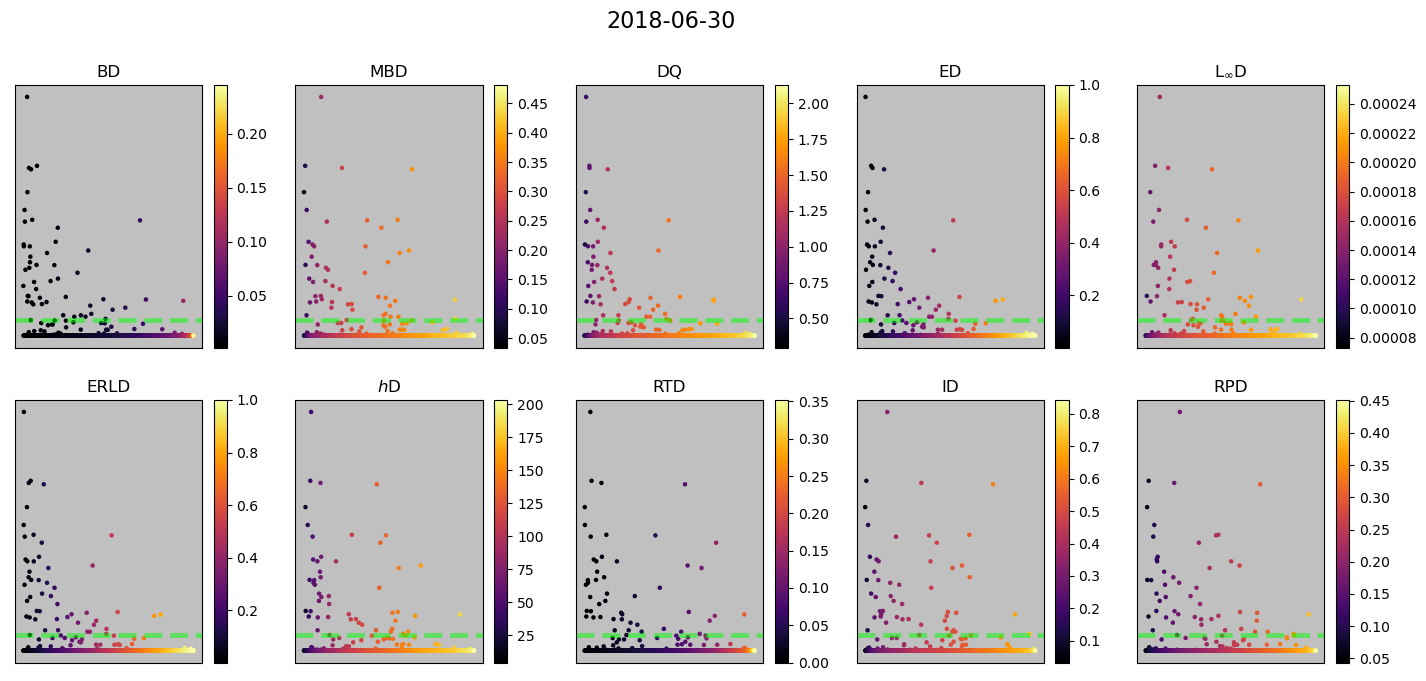

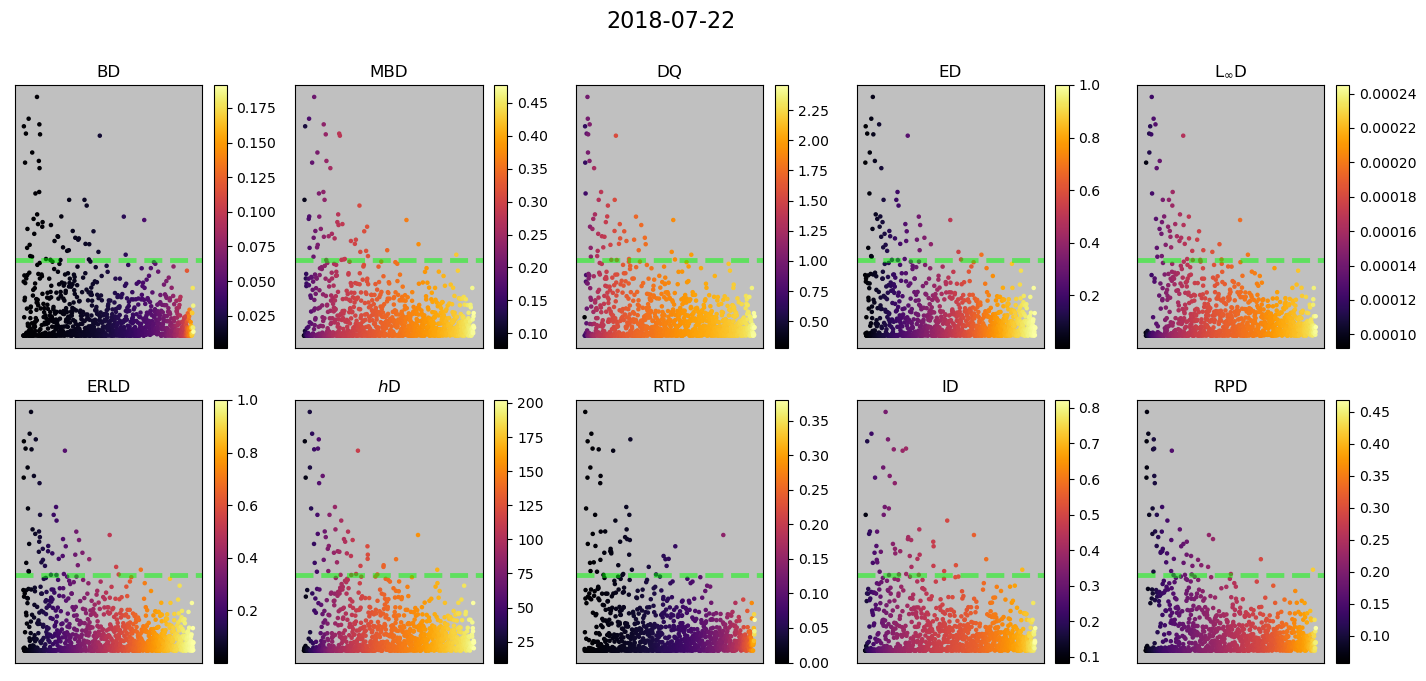

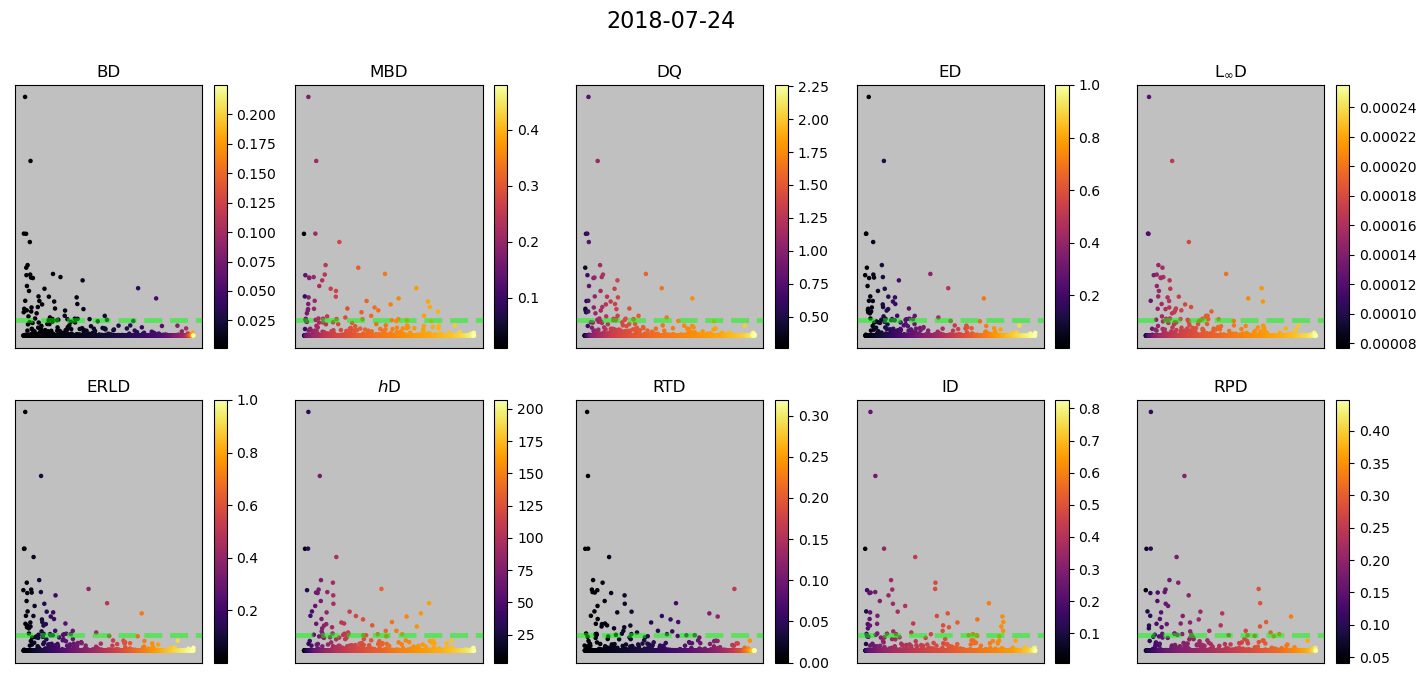

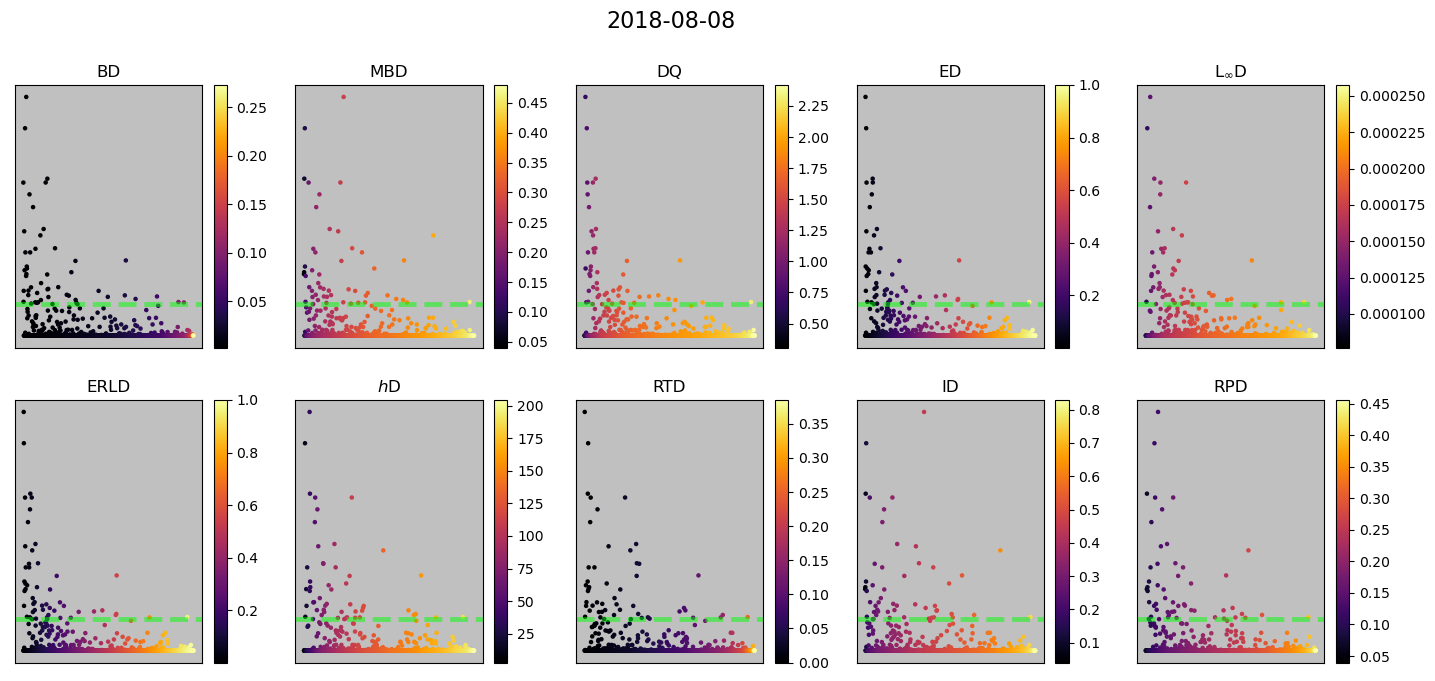

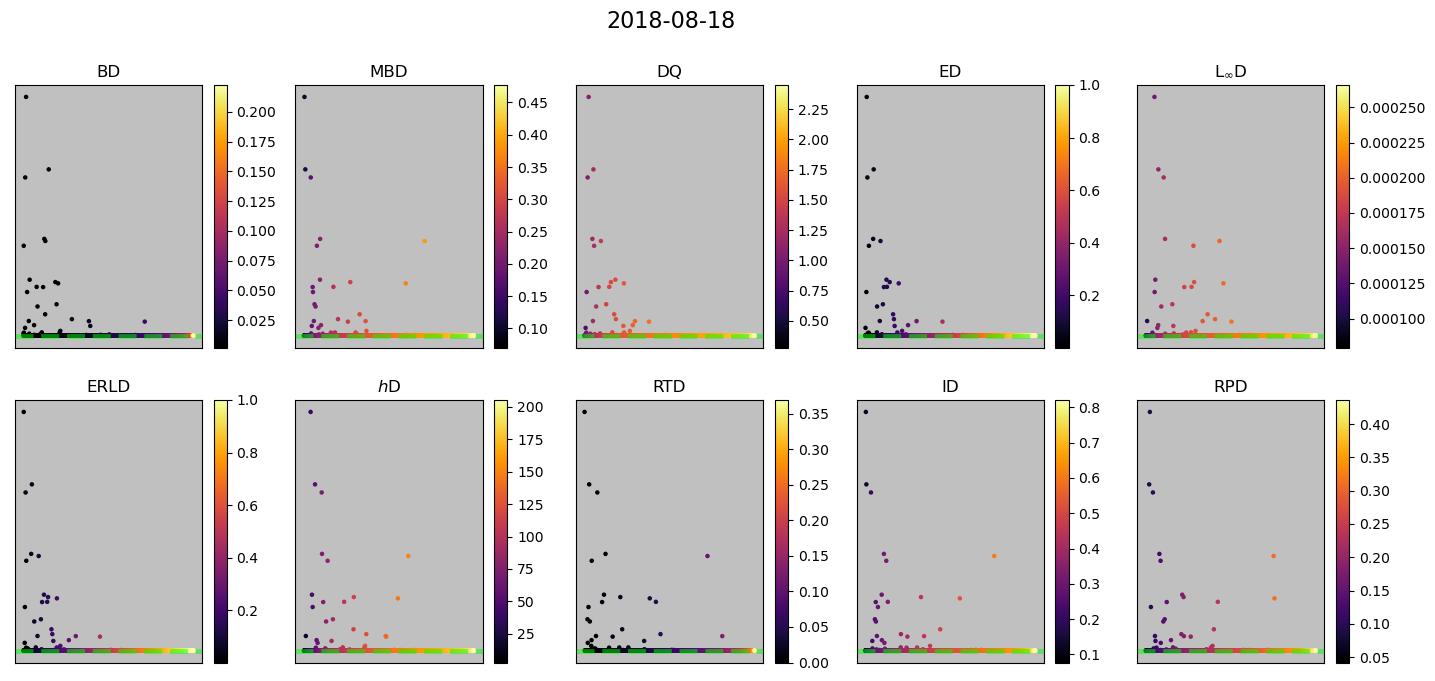

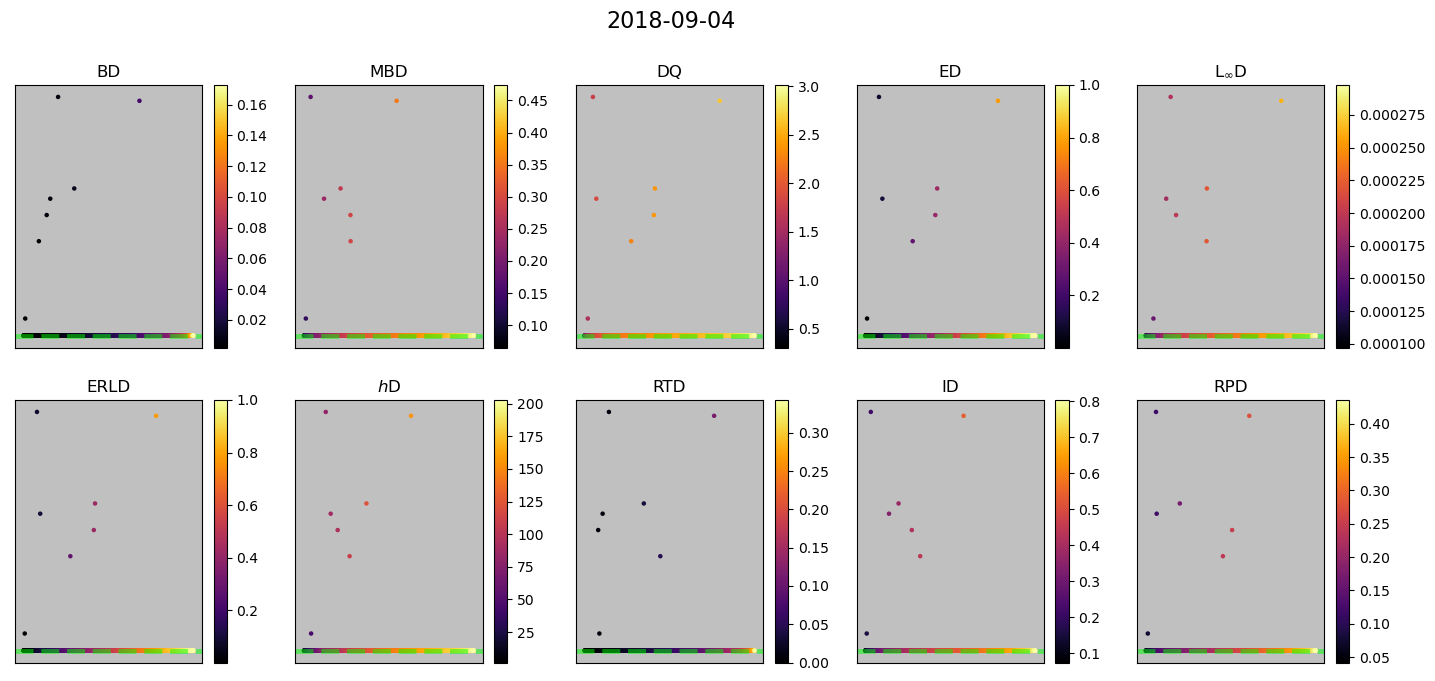

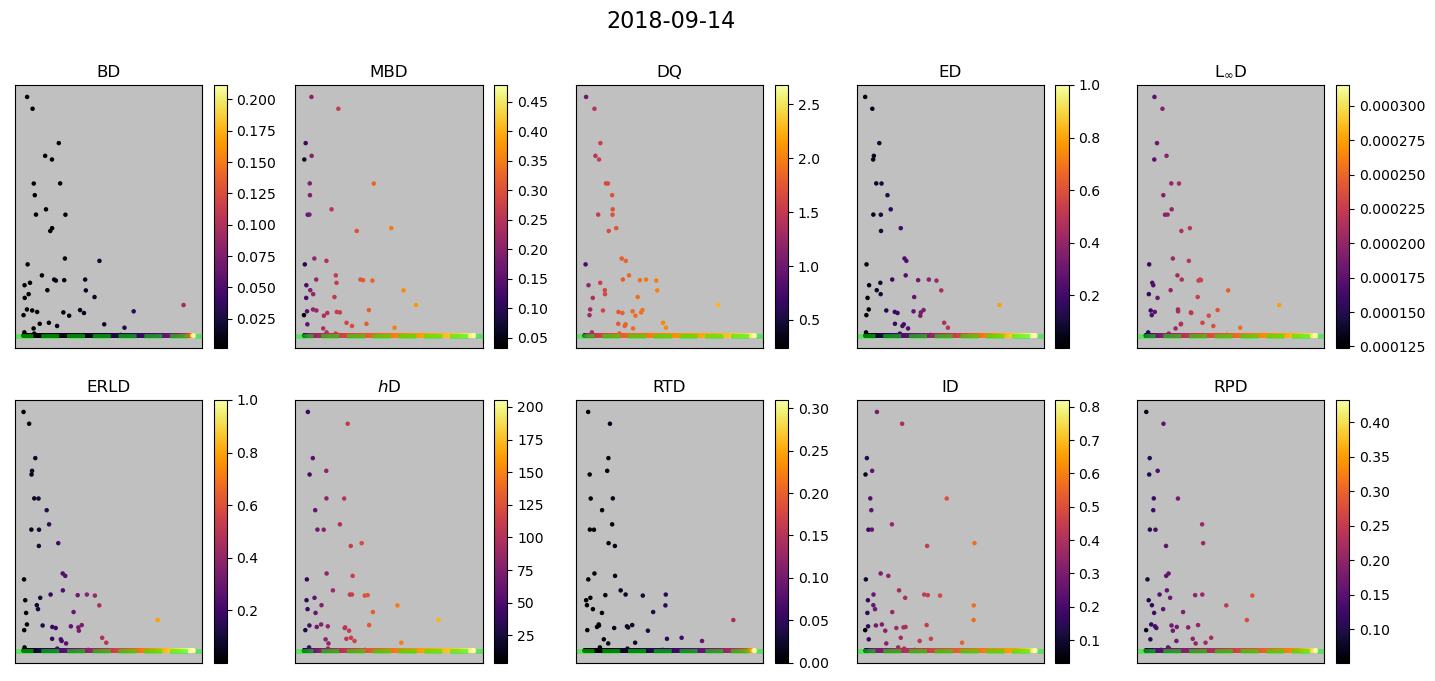

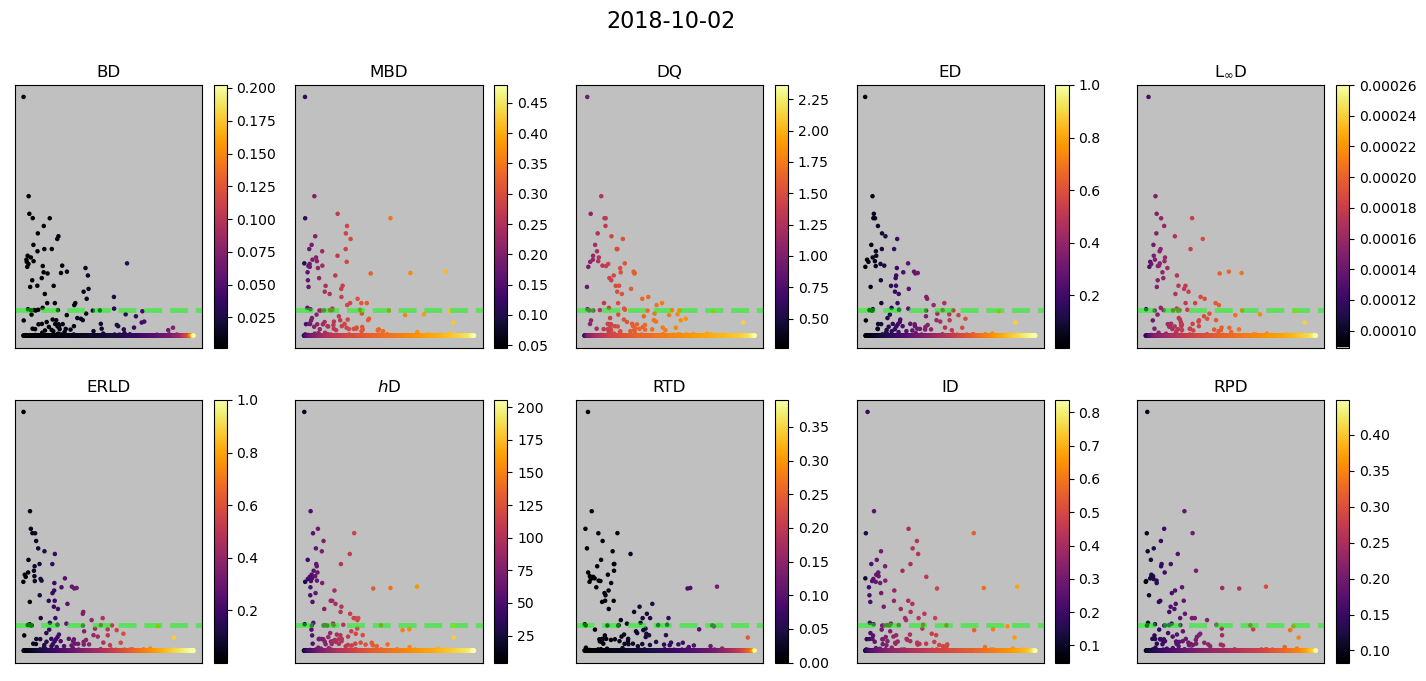

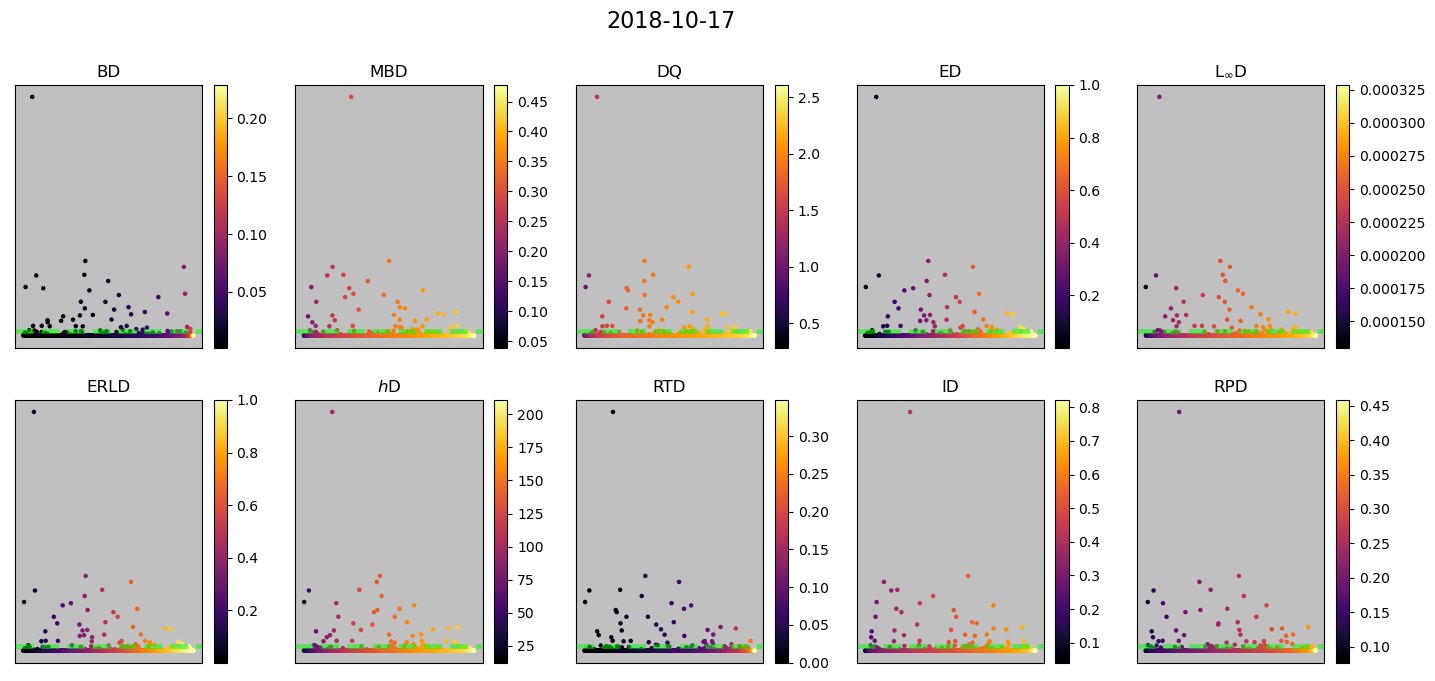

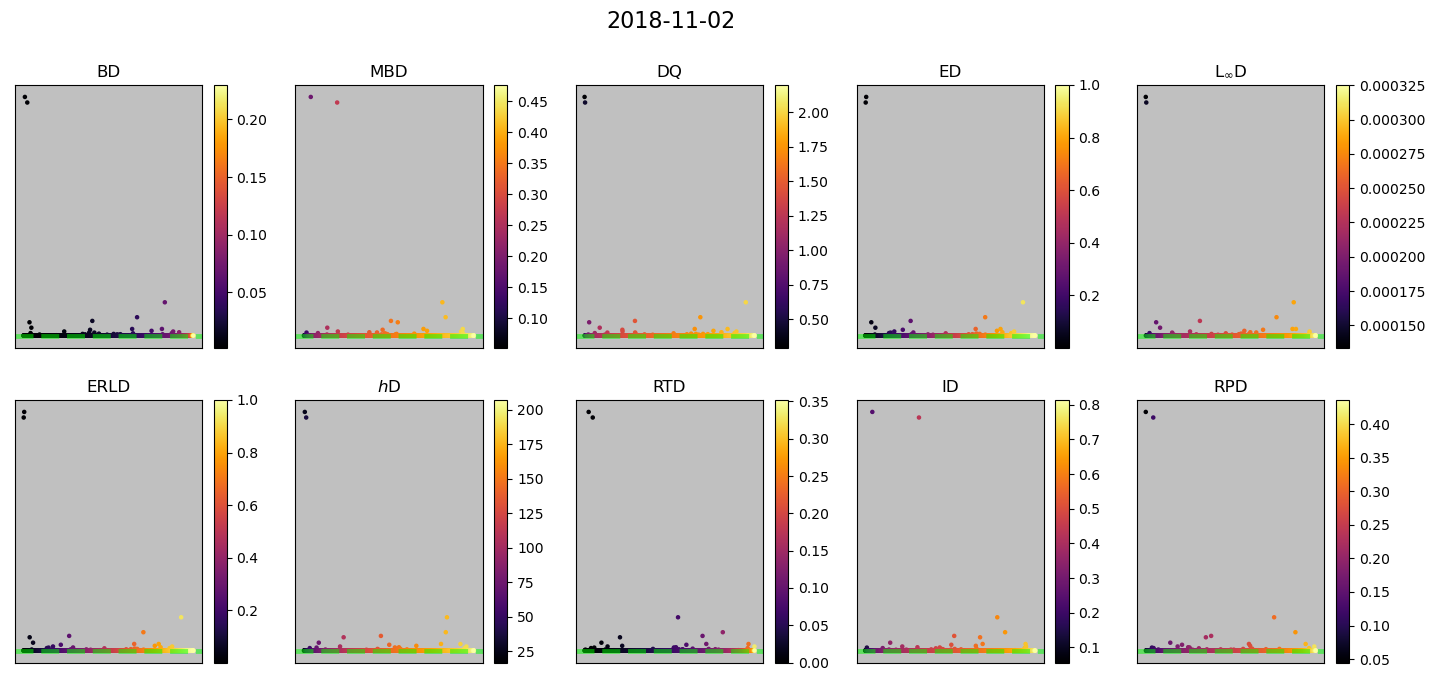

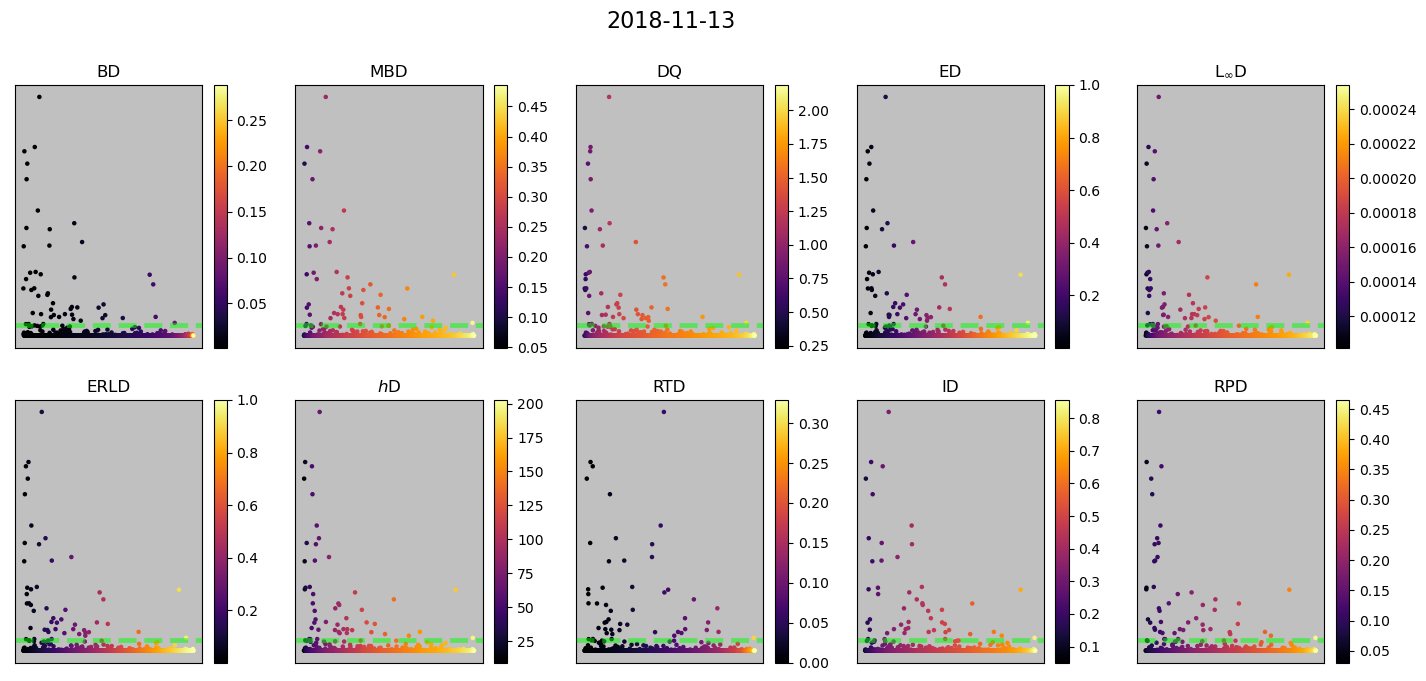

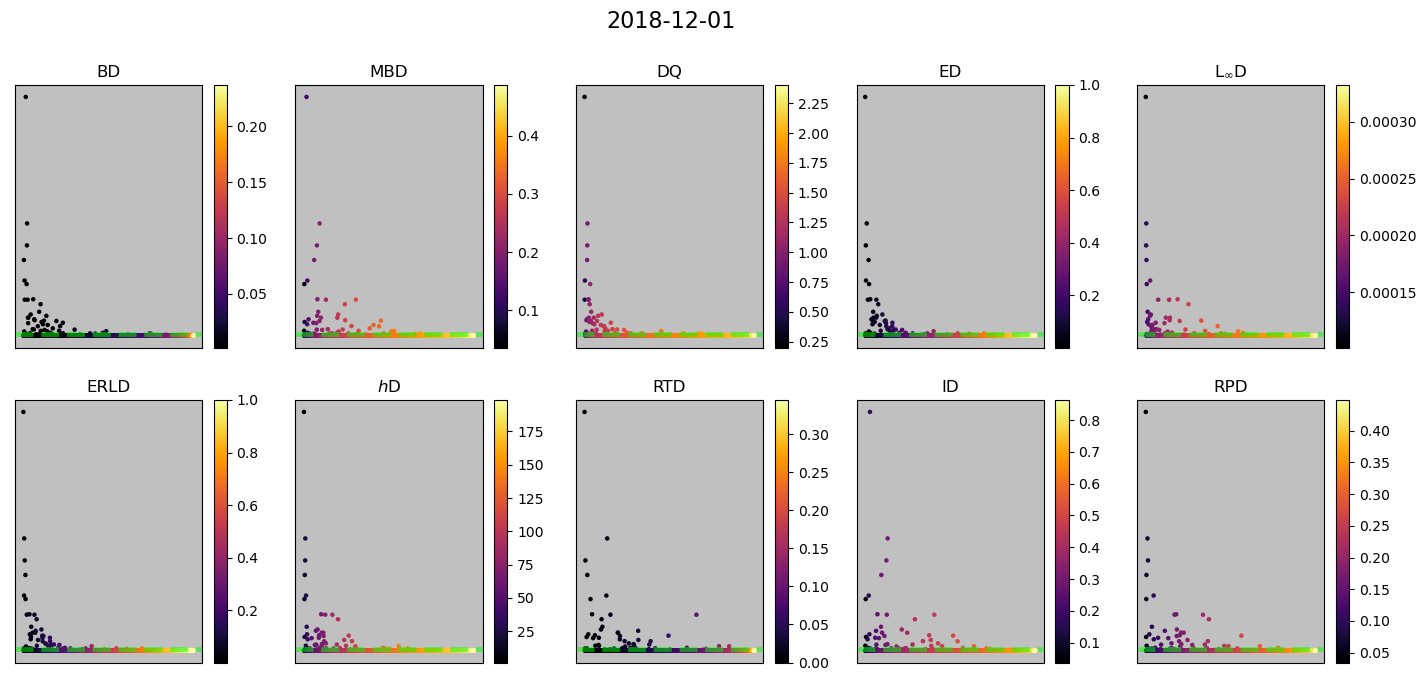

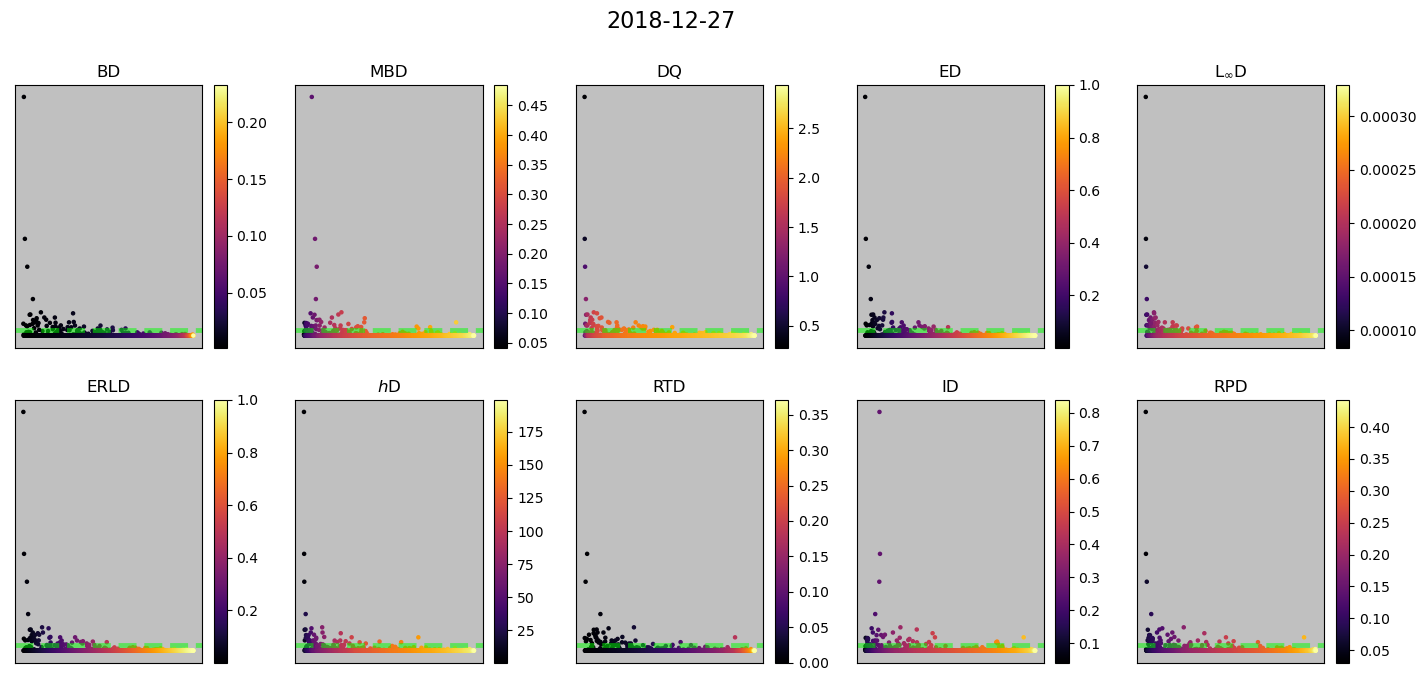

In [540]:
def _geater(Y_sc_, id_rank_):
    
    a_mu  = np.sum(np.mean(Y_sc_, axis = 1))
    a_sc_ = np.sum(Y_sc_, axis = 0)
    
    j = 0
    k = 0
    id_rank_prime_ = np.zeros(id_rank_.shape)
    
    N_scenarios = id_rank_.shape[0]
    
    for i in id_rank_:

        if a_sc_[i] > a_mu:
            id_rank_prime_[j] = i
            j += 1
        else:
            id_rank_prime_[N_scenarios - k - 1] = i
            k += 1
            
    return id_rank_prime_.astype(int)

i_feature = 4
i_vatic   = 1

for i_day in range(N_days):

    y_ = Y_[:, i_vatic, i_day]
    x_ = np.sum(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.max(X_[i_feature][..., i_day], axis = 1) + np.min(X_[i_feature][..., i_day], axis = 1) + np.mean(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.sum(np.diff(X_[i_feature][..., i_day], axis = 1), axis = 1)

    idx_extreme_ = np.argsort(y_)
    idx_area_    = np.argsort(x_)

    y = y_[idx_extreme_][-50]
    x = x_[idx_area_][-50]
        
    plt.figure(figsize = (17.5, 7.5))
    plt.suptitle(dates_[i_day], fontsize = 16)
    
    for i_metric in range(N_metrics):

        ax = plt.subplot2grid( (2, 5), idx_plot_[i_metric] )
#
        z_ = aggFunAUC_[i_metric, i_feature, i_day, :]
        #z_ = fdiff_[i_metric, i_feature, i_day, :]

        #z_ = 1. - z_/z_.sum()
            
        ax.set_title(metrics_[i_metric], fontsize = 12)

        
        ax.axhline(y, color     = 'lime', 
                       linestyle = '--', 
                       linewidth = 3.5, 
                       alpha     = 0.5)
        
        ax.set_xticks([],[])
        ax.set_yticks([],[])
        
        idx_ = np.argsort(z_)#[::-1]
        #idx_ = _geater(X_[i_feature][..., i_day].T, idx_)
        
        #im = ax.scatter(np.arange(1000), z_[idx_], c = y_[idx_], s = 5., cmap = 'inferno')
        im = ax.scatter(np.arange(1000), y_[idx_], c = z_[idx_], s = 5., cmap = 'inferno')

        # add the bar
        cbar = plt.colorbar(im)
    plt.savefig("/Users/Guille/Desktop/extreme_scenarios/images/" + '{}.png'.format(i_day))
    plt.show()

In [531]:
i_feature = 4
i_vatic   = 0

N_extreme = 100
N_sel     = 150
N_area    = 300

score_fdepth_ = np.zeros((N_days, N_metrics))
score_bl_     = np.zeros((N_days,))
score_sample_ = np.zeros((N_days,))

features_ = [4, 3]
areas_    = [200, 1000]
select_   = [150, 0]

for i_day in range(N_days):

    y_ = Y_[:, i_vatic, i_day]
    x_ = np.sum(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.sum(np.diff(X_[i_feature][..., i_day], axis = 1), axis = 1)

    idx_extreme_ = np.argsort(y_)[::-1]
    idx_area_    = np.argsort(x_)[::-1]
    
    score_bl_[i_day] = np.intersect1d(idx_extreme_[:N_extreme], idx_area_[:N_sel]).shape[0]
        
    ranks_ = []
    for i_metric in range(N_metrics):
        
        features_rank_ = []
        for j_feature in range(len(features_)):
    
            idx_depth_ = np.argsort(aggFunAUC_[i_metric, features_[j_feature], i_day, idx_area_[:areas_[j_feature]]])#[::-1]
            features_rank_.append(idx_area_[:areas_[j_feature]][idx_depth_[:select_[j_feature]]])

        ranks_.append(np.unique(np.concatenate(features_rank_)))
        
        score_fdepth_[i_day, i_metric] = np.intersect1d(idx_extreme_[:N_extreme], ranks_[-1]).shape[0]
        
name = 'e{}v{}f{}auc{}s{}.png'.format(N_extreme, i_vatic, i_feature, N_sel, N_area)
print(name)

caption_ = "Top {} {} | -Feature: {} -# AUC Filtered: {} -# Selected: {}".format(N_extreme, vatic_[i_vatic], i_feature, N_area, N_sel)
df_ = np.concatenate([score_bl_[:, np.newaxis], score_fdepth_], axis = 1)
df_ = np.concatenate([df_, np.mean(df_, axis = 0)[np.newaxis, :], np.median(df_, axis = 0)[np.newaxis, :]], axis = 0)   
df_ = pd.DataFrame(df_, columns = ['AUC'] +  metrics_ , index = dates_.tolist() + ['Mean', 'Meadian'])
print(caption_)
display(df_)
print(df_.to_latex())

e100v0f4auc150s300.png
Top 100 Variable Costs | -Feature: 4 -# AUC Filtered: 300 -# Selected: 150


AUC     BD     MBD     DQ     ED  L$_\infty$D   ERLD    $h$D  \
2018-01-02  100.00  90.00   99.00  96.00  96.00        93.00  96.00   97.00   
2018-01-20  100.00  91.00  100.00  98.00  97.00       100.00  97.00  100.00   
2018-02-13  100.00  89.00  100.00  97.00  97.00        96.00  97.00  100.00   
2018-02-14  100.00  84.00  100.00  92.00  93.00        94.00  94.00   97.00   
2018-02-26  100.00  83.00   99.00  92.00  93.00        93.00  93.00   97.00   
2018-03-14  100.00  85.00   99.00  92.00  93.00        94.00  92.00   98.00   
2018-04-01  100.00  88.00  100.00  96.00  97.00        96.00  97.00   99.00   
2018-04-09  100.00  85.00  100.00  92.00  92.00        96.00  92.00   99.00   
2018-04-24  100.00  88.00  100.00  91.00  92.00        93.00  92.00   96.00   
2018-05-10  100.00  87.00   99.00  95.00  95.00        95.00  95.00   99.00   
2018-05-25  100.00  93.00  100.00  97.00  98.00        99.00  98.00  100.00   
2018-06-04   99.00  93.00   99.00  97.00  98.00       100.00  98.00   98.00   
2018-06-30  100.00  85.00   98.00  93.00  93.00        94.00  93.00   96.00   
2018-07-22  100.00  79.00   97.00  87.00  87.00        93.00  87.00   93.00   
2018-07-24   99.00  87.00   98.00  89.00  89.00        94.00  89.00   95.00   
2018-08-08   99.00  81.00   98.00  88.00  87.00        93.00  87.00   92.00   
2018-08-18   99.00  86.00   98.00  92.00  92.00        97.00  92.00   99.00   
2018-09-04  100.00  84.00  100.00  95.00  94.00        95.00  94.00   97.00   
2018-09-14  100.00  88.00  100.00  96.00  95.00        97.00  95.00   98.00   
2018-10-02  100.00  86.00   98.00  90.00  91.00        93.00  91.00   96.00   
2018-10-17  100.00  79.00   99.00  85.00  86.00        90.00  86.00   95.00   
2018-11-02  100.00  86.00   99.00  89.00  89.00        90.00  89.00   94.00   
2018-11-13  100.00  89.00  100.00  94.00  95.00        98.00  95.00   99.00   
2018-12-01  100.00  87.00   98.00  93.00  93.00        96.00  93.00  100.00   
2018-12-27  100.00  91.00  100.00  96.00  96.00        99.00  96.00  100.00   
Mean         99.84  86.56   99.12  92.88  93.12        95.12  93.12   97.36   
Meadian     100.00  87.00   99.00  93.00  93.00        95.00  93.00   98.00   

             RTD     ID     RPD  
2018-01-02  89.0   98.0   99.00  
2018-01-20  94.0   96.0  100.00  
2018-02-13  96.0  100.0   99.00  
2018-02-14  89.0   98.0  100.00  
2018-02-26  92.0   97.0   99.00  
2018-03-14  92.0   98.0   99.00  
2018-04-01  93.0  100.0   97.00  
2018-04-09  92.0   98.0  100.00  
2018-04-24  92.0   99.0  100.00  
2018-05-10  91.0   98.0  100.00  
2018-05-25  90.0   99.0  100.00  
2018-06-04  93.0   99.0  100.00  
2018-06-30  92.0   96.0  100.00  
2018-07-22  87.0   97.0  100.00  
2018-07-24  87.0   96.0   95.00  
2018-08-08  87.0   98.0   98.00  
2018-08-18  88.0   98.0   99.00  
2018-09-04  95.0   98.0   98.00  
2018-09-14  92.0   98.0  100.00  
2018-10-02  90.0   96.0   94.00  
2018-10-17  86.0   98.0   95.00  
2018-11-02  91.0   98.0  100.00  
2018-11-13  93.0   97.0  100.00  
2018-12-01  90.0   96.0  100.00  
2018-12-27  99.0   99.0  100.00  
Mean        91.2   97.8   98.88  
Meadian     92.0   98.0  100.00

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     AUC &     BD &     MBD &     DQ &     ED &  L\$\_\textbackslash infty\$D &   ERLD &    \$h\$D &   RTD &     ID &     RPD \\
\midrule
2018-01-02 &  100.00 &  90.00 &   99.00 &  96.00 &  96.00 &        93.00 &  96.00 &   97.00 &  89.0 &   98.0 &   99.00 \\
2018-01-20 &  100.00 &  91.00 &  100.00 &  98.00 &  97.00 &       100.00 &  97.00 &  100.00 &  94.0 &   96.0 &  100.00 \\
2018-02-13 &  100.00 &  89.00 &  100.00 &  97.00 &  97.00 &        96.00 &  97.00 &  100.00 &  96.0 &  100.0 &   99.00 \\
2018-02-14 &  100.00 &  84.00 &  100.00 &  92.00 &  93.00 &        94.00 &  94.00 &   97.00 &  89.0 &   98.0 &  100.00 \\
2018-02-26 &  100.00 &  83.00 &   99.00 &  92.00 &  93.00 &        93.00 &  93.00 &   97.00 &  92.0 &   97.0 &   99.00 \\
2018-03-14 &  100.00 &  85.00 &   99.00 &  92.00 &  93.00 &        94.00 &  92.00 &   98.00 &  92.0 &   98.0 &   99.00 \\
2018-04-01 &  100.00 &  88.00 &  100.00 &  96.00 &  97.00 &        96.00 &  97.00 &   9

/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/2617886564.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_.to_latex())


In [517]:
i_feature = 4
i_vatic   = 3

N_extreme = 100
N_sel     = 150
N_area    = 300

score_fdepth_ = np.zeros((N_days, N_metrics))
score_bl_     = np.zeros((N_days,))
score_sample_ = np.zeros((N_days,))

features_ = [4, 3]
areas_     = [250, 1000]
select_   = [150, 0]

for i_day in range(N_days):

    y_ = Y_[:, i_vatic, i_day]
    x_ = np.sum(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.sum(np.diff(X_[i_feature][..., i_day], axis = 1), axis = 1)

    idx_extreme_ = np.argsort(y_)[::-1]
    idx_area_    = np.argsort(x_)[::-1]
    
    score_bl_[i_day] = np.intersect1d(idx_extreme_[:N_extreme], idx_area_[:N_sel]).shape[0]
        
    ranks_ = []
    for i_metric in range(N_metrics):
        
        features_rank_ = []
        for j_feature in range(len(features_)):
            
    
            idx_depth_ = np.argsort(aggFunAUC_[i_metric, features_[j_feature], i_day, idx_area_[:areas_[j_feature]]])#[::-1]
        
        
            features_rank_.append(idx_area_[:areas_[j_feature]][idx_depth_[:select_[j_feature]]])

        ranks_.append(np.unique(np.concatenate(features_rank_)))
        
        score_fdepth_[i_day, i_metric] = np.intersect1d(idx_extreme_[:N_extreme], ranks_[-1]).shape[0]
        
#     ranks_ = np.stack(ranks_)
    
#     for i in range(N_area):
#         idx_ensamble_ = np.unique(ranks_[:, :i])
#         if idx_ensamble_.shape[0] == N_sel:
#             break
#         if idx_ensamble_.shape[0] > N_sel:
#             idx_ensamble_ = idx_ensamble_[:N_sel]
#             break
    
#     score_sample_[i_day] = np.intersect1d(idx_extreme_[:N_extreme], idx_ensamble_).shape[0]

name = 'e{}v{}f{}auc{}s{}.png'.format(N_extreme, i_vatic, i_feature, N_sel, N_area)
print(name)

caption_ = "Top {} {} | -Feature: {} -# AUC Filtered: {} -# Selected: {}".format(N_extreme, vatic_[i_vatic], i_feature, N_area, N_sel)
df_ = np.concatenate([score_bl_[:, np.newaxis], score_fdepth_], axis = 1)
df_ = np.concatenate([df_, np.mean(df_, axis = 0)[np.newaxis, :], np.median(df_, axis = 0)[np.newaxis, :]], axis = 0)   
df_ = pd.DataFrame(df_, columns = ['AUC'] +  metrics_ , index = dates_.tolist() + ['Mean', 'Meadian'])
print(caption_)
display(df_)
print(df_.to_latex())

e100v3f4auc150s300.png
Top 100 Reserve Shortfall | -Feature: 4 -# AUC Filtered: 300 -# Selected: 150


AUC     BD    MBD     DQ     ED  L$_\infty$D  ERLD   $h$D    RTD  \
2018-01-02  99.0  88.00   97.0  92.00  92.00        95.00  92.0  98.00  94.00   
2018-01-20  98.0  90.00  100.0  98.00  96.00        98.00  96.0  99.00  95.00   
2018-02-13  85.0  83.00   88.0  89.00  89.00        88.00  89.0  89.00  84.00   
2018-02-14  96.0  79.00   97.0  92.00  91.00        92.00  91.0  98.00  82.00   
2018-02-26  97.0  86.00   94.0  93.00  92.00        94.00  92.0  99.00  89.00   
2018-03-14  95.0  78.00   94.0  88.00  88.00        89.00  87.0  93.00  92.00   
2018-04-01  90.0  79.00   94.0  89.00  90.00        92.00  90.0  94.00  88.00   
2018-04-09  84.0  80.00   80.0  89.00  89.00        87.00  89.0  88.00  73.00   
2018-04-24  85.0  83.00   89.0  86.00  86.00        91.00  86.0  91.00  93.00   
2018-05-10  71.0  69.00   78.0  73.00  74.00        78.00  74.0  77.00  82.00   
2018-05-25  93.0  85.00   93.0  92.00  91.00        94.00  91.0  95.00  84.00   
2018-06-04  92.0  81.00   90.0  88.00  89.00        93.00  89.0  94.00  86.00   
2018-06-30  92.0  77.00   87.0  89.00  89.00        92.00  89.0  94.00  80.00   
2018-07-22  99.0  68.00   93.0  75.00  75.00        86.00  76.0  91.00  79.00   
2018-07-24  84.0  76.00   85.0  81.00  81.00        90.00  81.0  85.00  86.00   
2018-08-08  80.0  77.00   87.0  85.00  85.00        90.00  86.0  89.00  85.00   
2018-08-18  93.0  77.00   91.0  86.00  85.00        91.00  85.0  94.00  82.00   
2018-09-04  91.0  76.00   94.0  86.00  85.00        93.00  85.0  95.00  87.00   
2018-09-14  91.0  79.00   92.0  87.00  87.00        97.00  88.0  96.00  82.00   
2018-10-02  87.0  80.00   89.0  90.00  90.00        91.00  90.0  93.00  90.00   
2018-10-17  80.0  77.00   82.0  80.00  80.00        83.00  80.0  84.00  81.00   
2018-11-02  82.0  79.00   89.0  87.00  87.00        88.00  87.0  91.00  87.00   
2018-11-13  88.0  85.00   93.0  90.00  90.00        97.00  90.0  98.00  78.00   
2018-12-01  91.0  85.00   92.0  90.00  89.00        96.00  89.0  97.00  82.00   
2018-12-27  92.0  86.00   97.0  86.00  87.00        98.00  88.0  99.00  87.00   
Mean        89.4  80.12   90.6  87.24  87.08        91.32  87.2  92.84  85.12   
Meadian     91.0  79.00   92.0  88.00  89.00        92.00  89.0  94.00  85.00   

               ID    RPD  
2018-01-02  96.00  99.00  
2018-01-20  98.00  99.00  
2018-02-13  84.00  90.00  
2018-02-14  96.00  98.00  
2018-02-26  91.00  98.00  
2018-03-14  91.00  89.00  
2018-04-01  93.00  89.00  
2018-04-09  80.00  83.00  
2018-04-24  85.00  91.00  
2018-05-10  78.00  79.00  
2018-05-25  91.00  90.00  
2018-06-04  88.00  87.00  
2018-06-30  88.00  90.00  
2018-07-22  92.00  97.00  
2018-07-24  82.00  83.00  
2018-08-08  83.00  89.00  
2018-08-18  87.00  93.00  
2018-09-04  92.00  95.00  
2018-09-14  89.00  87.00  
2018-10-02  85.00  93.00  
2018-10-17  79.00  80.00  
2018-11-02  86.00  90.00  
2018-11-13  92.00  94.00  
2018-12-01  88.00  97.00  
2018-12-27  95.00  96.00  
Mean        88.36  91.04  
Meadian     88.00  90.00

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &   AUC &     BD &    MBD &     DQ &     ED &  L\$\_\textbackslash infty\$D &  ERLD &   \$h\$D &    RTD &     ID &    RPD \\
\midrule
2018-01-02 &  99.0 &  88.00 &   97.0 &  92.00 &  92.00 &        95.00 &  92.0 &  98.00 &  94.00 &  96.00 &  99.00 \\
2018-01-20 &  98.0 &  90.00 &  100.0 &  98.00 &  96.00 &        98.00 &  96.0 &  99.00 &  95.00 &  98.00 &  99.00 \\
2018-02-13 &  85.0 &  83.00 &   88.0 &  89.00 &  89.00 &        88.00 &  89.0 &  89.00 &  84.00 &  84.00 &  90.00 \\
2018-02-14 &  96.0 &  79.00 &   97.0 &  92.00 &  91.00 &        92.00 &  91.0 &  98.00 &  82.00 &  96.00 &  98.00 \\
2018-02-26 &  97.0 &  86.00 &   94.0 &  93.00 &  92.00 &        94.00 &  92.0 &  99.00 &  89.00 &  91.00 &  98.00 \\
2018-03-14 &  95.0 &  78.00 &   94.0 &  88.00 &  88.00 &        89.00 &  87.0 &  93.00 &  92.00 &  91.00 &  89.00 \\
2018-04-01 &  90.0 &  79.00 &   94.0 &  89.00 &  90.00 &        92.00 &  90.0 &  94.00 &  88.00 &  93.00 &  89.00 \\
2018-

/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/895878676.py:64: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_.to_latex())


In [478]:
i_feature = 4
i_vatic   = 1

N_extreme = 50
N_sel     = 150

energy_fdepth_ = np.zeros((N_days, N_metrics))
frac_fdepth_   = np.zeros((N_days, N_metrics))
energy_bl_     = np.zeros((N_days,))
frac_bl_       = np.zeros((N_days,))

total_        = np.zeros((N_days,))
N_extremes_   = np.zeros((N_days,), dtype = int)
N_selected_   = np.zeros((N_days,), dtype = int)


features_ = [4, 3]
areas_    = [850, 1000]
select_   = [195, 0]
revert_   = [1, 1]

select_   = (np.array(select_)/np.array(select_).sum()).tolist()

for i_day in range(N_days):

    y_ = Y_[:, i_vatic, i_day]
    x_ = np.sum(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.sum(np.diff(X_[i_feature][..., i_day], axis = 1), axis = 1)

    idx_extreme_ = np.argsort(y_)[::-1]
    idx_area_    = np.argsort(x_)[::-1]
    
    N_extremes_[i_day] = int(np.sum(y_ > 0.))

    total_[i_day] = y_[idx_extreme_[:N_extremes_[i_day]]].sum()/1000.
    #total_[i_day] = N_sel
    
    
    idx_sel_ = np.sum(X_[i_feature][..., i_day] > 66000., axis = 1) > 0.

    N_selected_[i_day] = N_sel + idx_sel_.sum()

    energy_bl_[i_day] = y_[idx_area_[:N_selected_[i_day]]].sum()/1000.
    frac_bl_[i_day]   = y_[idx_area_[:N_selected_[i_day]]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()

    ranks_ = []
    for i_metric in range(N_metrics):
        
        features_rank_ = []
        for j_feature in range(len(features_)):
            
            N_sel_p = int(N_selected_[i_day]*select_[j_feature])
    
            idx_depth_ = np.argsort(aggFunAUC_[i_metric, features_[j_feature], i_day, idx_area_[:areas_[j_feature]]])[::revert_[j_feature]]
            features_rank_.append(idx_area_[:areas_[j_feature]][idx_depth_[:N_sel_p]])

        ranks_.append(np.unique(np.concatenate(features_rank_)))
        
        frac_fdepth_[i_day, i_metric] = y_[ranks_[-1]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()
        energy_fdepth_[i_day, i_metric] = y_[ranks_[-1]].sum()/1000.

name = 'e{}v{}f{}auc{}s{}.png'.format(N_extreme, i_vatic, i_feature, N_sel, N_area)
print(name)

caption_ = "Top {} {} | -Feature: {} -# AUC Filtered: {} -# Selected: {}".format(N_extreme, vatic_[i_vatic], i_feature, N_area, N_sel)
df_1 = np.concatenate([N_extremes_[:, np.newaxis], N_selected_[:, np.newaxis], total_[:, np.newaxis], energy_bl_[:, np.newaxis], energy_fdepth_], axis = 1)
df_2 = np.concatenate([N_extremes_[:, np.newaxis], N_selected_[:, np.newaxis], total_[:, np.newaxis], frac_bl_[:, np.newaxis], frac_fdepth_], axis = 1)

df_1 = np.nan_to_num(df_1)
df_2 = np.nan_to_num(df_2)

df_ = np.concatenate([df_1, np.sum(df_1, axis = 0)[np.newaxis, :], np.mean(df_2, axis = 0)[np.newaxis, :]], axis = 0)   
df_ = pd.DataFrame(df_, columns = ['No. Scen.', 'No. Sel.', 'Energy', 'AUC'] +  metrics_ , index = dates_.tolist() + ['Total', 'Ex. Frac.'])
print(caption_)

df_ = np.round(df_, decimals = 2)
display(df_)
print(df_.to_latex())

e50v1f4auc150s300.png
Top 50 Load Shedding | -Feature: 4 -# AUC Filtered: 300 -# Selected: 150


No. Scen.  No. Sel.   Energy      AUC       BD      MBD       DQ  \
2018-01-02     681.00    293.00  2573.91  2297.06  1986.73  2223.36  2155.56   
2018-01-20      41.00    150.00    31.50    29.85    30.97    29.80    31.37   
2018-02-13      55.00    150.00    35.92    30.16    34.17    25.31    35.32   
2018-02-14      50.00    150.00    78.58    76.48    77.53    73.89    78.14   
2018-02-26      24.00    150.00    19.17    18.42    18.72    19.03    18.98   
2018-03-14      75.00    150.00    72.87    55.48    62.70    53.49    70.34   
2018-04-01     131.00    150.00   108.30    65.75    51.98    59.62    62.66   
2018-04-09      61.00    150.00    39.31    29.34    30.52    23.30    31.87   
2018-04-24     159.00    150.00   127.52    90.02    82.05    82.34    97.30   
2018-05-10      99.00    150.00    54.40    35.35    31.63    35.28    37.05   
2018-05-25     166.00    150.00   157.49   105.70    78.34   102.69   103.50   
2018-06-04      72.00    150.00    40.98    27.02    32.75    27.79    36.01   
2018-06-30      89.00    150.00    46.49    30.59    36.15    28.56    36.61   
2018-07-22     855.00    912.00  2105.68  2080.65  2049.60  2049.60  2049.60   
2018-07-24     198.00    492.00   109.14    93.97   100.97    98.52   104.26   
2018-08-08     213.00    229.00    99.77    75.69    73.56    74.64    81.59   
2018-08-18      42.00    151.00    12.20     9.38    10.99     9.69    11.64   
2018-09-04       7.00    150.00     2.13     0.84     0.79     1.16     0.84   
2018-09-14      49.00    150.00    22.29    15.67    15.05    17.19    18.01   
2018-10-02     118.00    150.00    64.83    43.41    45.80    47.76    50.64   
2018-10-17      96.00    150.00     1.63     0.39     0.41     0.33     0.39   
2018-11-02      34.00    150.00     5.00     4.08     4.00     3.94     4.02   
2018-11-13     179.00    150.00    60.48    48.40    43.17    44.44    47.36   
2018-12-01      69.00    150.00    38.90    32.71    36.83    34.59    37.83   
2018-12-27     174.00    150.00   217.59   182.03   158.99   177.80   176.85   
Total         3737.00   5077.00  6126.09  5478.44  5094.41  5344.12  5377.75   
Ex. Frac.      149.48    203.08   245.04     0.75     0.75     0.74     0.81   

                 ED  L$_\infty$D     ERLD     $h$D      RTD       ID      RPD  
2018-01-02  2200.84      2281.85  2200.84  2307.16  2018.75  2188.34  2236.21  
2018-01-20    31.37        31.38    31.37    31.38    30.68    29.51    31.38  
2018-02-13    35.39        35.20    35.39    34.50    33.99    20.80    34.51  
2018-02-14    78.12        78.03    78.12    78.01    76.06    73.29    78.05  
2018-02-26    18.73        19.17    18.73    19.03    19.17    19.02    19.03  
2018-03-14    69.17        67.33    69.17    66.02    59.70    49.75    60.67  
2018-04-01    63.37        59.08    63.37    61.84    54.30    55.50    57.79  
2018-04-09    31.85        34.10    31.87    31.03    21.70    23.25    27.64  
2018-04-24    98.19       100.94    98.19    93.09    86.39    81.32    85.15  
2018-05-10    38.31        31.05    38.62    34.55    25.92    32.14    36.59  
2018-05-25   101.68        92.08   102.02    96.26    67.49    99.93    99.95  
2018-06-04    35.35        29.87    35.35    26.63    27.16    25.60    25.53  
2018-06-30    37.04        29.60    37.04    29.32    31.75    26.67    27.13  
2018-07-22  2049.60      2049.60  2049.60  2049.60  2049.60  2049.60  2049.60  
2018-07-24   103.99       101.97   103.99   100.41    97.51    95.39    95.67  
2018-08-08    81.59        79.80    81.47    78.70    77.06    70.73    75.33  
2018-08-18    11.68         8.28    11.68     9.54     9.64     9.82     9.99  
2018-09-04     0.84         1.10     0.84     1.10     1.10     1.16     1.16  
2018-09-14    18.16        18.35    18.58    17.15    18.99    17.28    18.13  
2018-10-02    50.85        46.61    50.85    51.15    47.37    41.31    52.02  
2018-10-17     0.44         0.48     0.44     0.47     0.55     0.38     0.52  
2018-11-02 

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  No. Scen. &  No. Sel. &   Energy &      AUC &       BD &      MBD &       DQ &       ED &  L\$\_\textbackslash infty\$D &     ERLD &     \$h\$D &      RTD &       ID &      RPD \\
\midrule
2018-01-02 &     681.00 &    293.00 &  2573.91 &  2297.06 &  1986.73 &  2223.36 &  2155.56 &  2200.84 &      2281.85 &  2200.84 &  2307.16 &  2018.75 &  2188.34 &  2236.21 \\
2018-01-20 &      41.00 &    150.00 &    31.50 &    29.85 &    30.97 &    29.80 &    31.37 &    31.37 &        31.38 &    31.37 &    31.38 &    30.68 &    29.51 &    31.38 \\
2018-02-13 &      55.00 &    150.00 &    35.92 &    30.16 &    34.17 &    25.31 &    35.32 &    35.39 &        35.20 &    35.39 &    34.50 &    33.99 &    20.80 &    34.51 \\
2018-02-14 &      50.00 &    150.00 &    78.58 &    76.48 &    77.53 &    73.89 &    78.14 &    78.12 &        78.03 &    78.12 &    78.01 &    76.06 &    73.29 &    78.05 \\
2018-02-26 &      24.00 &    150.00 &    19.17 &    18.42 &    

/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/2541568251.py:79: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_.to_latex())


In [444]:
i_feature = 3
i_vatic   = 2

N_extreme = 50
N_sel     = 50

frac_fdepth_ = np.zeros((N_days, N_metrics))
energy_fdepth_ = np.zeros((N_days, N_metrics))

frac_bl_     = np.zeros((N_days,))
energy_bl_     = np.zeros((N_days,))

total_        = np.zeros((N_days,))
N_extremes_   = np.zeros((N_days,), dtype = int)
N_selected_   = np.zeros((N_days,), dtype = int)


features_ = [0, 3, 4]
areas_    = [900, 1000, 900]
select_   = [200, 0, 0]
revert_   = [1, -1, 1]

select_   = (np.array(select_)/np.array(select_).sum()).tolist()

for i_day in range(N_days):

    y_ = Y_[:, i_vatic, i_day]
    x_ = np.sum(X_[i_feature][..., i_day], axis = 1)
    #x_ = np.sum(np.diff(X_[i_feature][..., i_day], axis = 1), axis = 1)

    idx_extreme_ = np.argsort(y_)[::-1]
    idx_area_    = np.argsort(x_)[::-1]
    
    N_extremes_[i_day] = int(np.sum(y_ > 0.))

    total_[i_day] = y_[idx_extreme_[:N_extremes_[i_day]]].sum()/1000.
    #total_[i_day] = N_sel
    
    
    #idx_sel_1 = np.sum(X_[0][..., i_day] > 60000., axis = 1) > 0.
    #idx_sel_ = (np.max(X_[i_feature][..., i_day], axis = 1) - np.min(X_[i_feature][..., i_day], axis = 1)) > 30000
    idx_sel_2 = np.max(X_[3][..., i_day], axis = 1) > 14450
    idx_sel_1 = np.min(X_[0][..., i_day], axis = 1) < 27500

    N_selected_[i_day] = idx_sel_2.sum() + N_sel
    
    if N_selected_[i_day] > 1000:
        N_selected_[i_day] = 1000.

    energy_bl_[i_day] = y_[idx_area_[:N_selected_[i_day]]].sum()/1000.
    frac_bl_[i_day]   = y_[idx_area_[:N_selected_[i_day]]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()

    ranks_ = []
    for i_metric in range(N_metrics):
        
        features_rank_ = []
        for j_feature in range(len(features_)):
            
            N_sel_p = int(N_selected_[i_day]*select_[j_feature])
            
    
            idx_depth_ = np.argsort(aggFunAUC_[i_metric, features_[j_feature], i_day, idx_area_[:areas_[j_feature]]])[::revert_[j_feature]]
            features_rank_.append(idx_area_[:areas_[j_feature]][idx_depth_[:N_sel_p]])

        ranks_.append(np.unique(np.concatenate(features_rank_)))
        
        frac_fdepth_[i_day, i_metric]   = y_[ranks_[-1]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()
        energy_fdepth_[i_day, i_metric] = y_[ranks_[-1]].sum()/1000.

name = 'e{}v{}f{}auc{}s{}.png'.format(N_extreme, i_vatic, i_feature, N_sel, N_area)
print(name)

caption_ = "Top {} {} | -Feature: {} -# AUC Filtered: {} -# Selected: {}".format(N_extreme, vatic_[i_vatic], i_feature, N_area, N_sel)
df_1 = np.concatenate([N_extremes_[:, np.newaxis], N_selected_[:, np.newaxis], total_[:, np.newaxis], energy_bl_[:, np.newaxis], energy_fdepth_], axis = 1)
df_2 = np.concatenate([N_extremes_[:, np.newaxis], N_selected_[:, np.newaxis], total_[:, np.newaxis], frac_bl_[:, np.newaxis], frac_fdepth_], axis = 1)

df_1 = np.nan_to_num(df_1)
df_2 = np.nan_to_num(df_2)

df_ = np.concatenate([df_1, np.sum(df_1, axis = 0)[np.newaxis, :], np.mean(df_2, axis = 0)[np.newaxis, :]], axis = 0)   
df_ = pd.DataFrame(df_, columns = ['No. Scen.', 'No. Sel.', 'Energy', 'AUC'] +  metrics_ , index = dates_.tolist() + ['Total', 'Ex. Frac.'])
print(caption_)

df_ = np.round(df_, decimals = 2)
display(df_)
print(df_.to_latex())

e50v2f3auc50s300.png
Top 50 Renewable Energy Curtailment | -Feature: 3 -# AUC Filtered: 300 -# Selected: 50


/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/2037157933.py:51: RuntimeWarning: invalid value encountered in double_scalars
  frac_bl_[i_day]   = y_[idx_area_[:N_selected_[i_day]]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()
/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/2037157933.py:67: RuntimeWarning: invalid value encountered in double_scalars
  frac_fdepth_[i_day, i_metric]   = y_[ranks_[-1]].sum()/y_[idx_extreme_[:N_extremes_[i_day]]].sum()


No. Scen.  No. Sel.   Energy      AUC       BD      MBD       DQ  \
2018-01-02     501.00      50.0    31.53     0.83     0.95     1.73     1.16   
2018-01-20     578.00     781.0   321.85   272.95   274.02   271.10   272.39   
2018-02-13     115.00      50.0    76.97     4.41    16.51     5.26    13.22   
2018-02-14     801.00     538.0   773.98   456.48   407.89   403.96   423.43   
2018-02-26     318.00     123.0     7.35     0.86     0.67     0.95     0.68   
2018-03-14     129.00     389.0    37.93    21.78    21.85    19.39    20.24   
2018-04-01      79.00      88.0    22.59     4.06     1.94     2.51     2.71   
2018-04-09      36.00      64.0    13.69     1.67     3.69     1.90     5.10   
2018-04-24     191.00     106.0    39.89    12.20     6.58     6.49     7.50   
2018-05-10     368.00    1000.0   126.12   126.12   122.10   122.10   122.10   
2018-05-25      40.00     497.0    54.30    30.04    39.60    30.63    35.09   
2018-06-04      22.00     262.0    26.88     5.21    24.35    13.28    22.06   
2018-06-30      23.00     835.0    37.72    34.29    37.72    37.62    37.62   
2018-07-22     883.00      75.0    92.26     8.20    24.32     4.80    23.41   
2018-07-24     400.00      50.0    49.36     4.16    25.60     9.68    26.99   
2018-08-08     336.00      50.0    28.53     0.26    10.21     2.12     9.78   
2018-08-18      33.00      54.0     0.62     0.00     0.19     0.07     0.14   
2018-09-04       0.00      50.0     0.00     0.00     0.00     0.00     0.00   
2018-09-14       2.00      50.0     0.01     0.00     0.00     0.00     0.00   
2018-10-02       7.00      68.0     1.21     0.00     0.21     0.35     0.35   
2018-10-17     122.00      50.0    14.89     0.63     1.57     1.48     1.55   
2018-11-02     715.00      68.0   295.17    27.18    23.05    20.00    22.42   
2018-11-13     100.00     231.0    87.32    34.00    37.63    21.61    42.21   
2018-12-01     115.00     946.0    18.43    18.34    15.28    15.28    15.28   
2018-12-27     123.00    1000.0    22.15    22.15    20.61    20.61    20.61   
Total         6037.00    7475.0  2180.77  1085.84  1116.53  1012.90  1126.02   
Ex. Frac.      241.48     299.0    87.23     0.33     0.42     0.34     0.42   

                 ED  L$_\infty$D     ERLD    $h$D      RTD       ID      RPD  
2018-01-02     1.00         2.32     1.00    2.21     0.98     1.97     2.17  
2018-01-20   267.85       268.86   267.60  267.83   270.42   273.15   267.80  
2018-02-13    10.97        11.77    13.11    8.75    11.76     3.31     4.41  
2018-02-14   411.26       398.98   412.01  381.49   407.19   406.75   407.11  
2018-02-26     0.74         1.22     0.74    1.24     0.91     0.98     1.09  
2018-03-14    19.96        20.94    19.96   18.43    21.09    19.61    19.34  
2018-04-01     2.72         3.86     2.90    4.13     2.73     2.68     3.67  
2018-04-09     2.65         4.33     4.06    2.65     4.06     1.90     1.75  
2018-04-24     7.43         5.96     6.96    5.53     5.53     6.28     6.79  
2018-05-10   122.10       122.10   122.10  122.10   122.10   122.10   122.10  
2018-05-25    35.09        39.36    35.09   37.31    38.32    26.29    31.82  
2018-06-04    22.06        17.57    22.06   14.07    20.11     5.96     5.70  
2018-06-30    37.62        37.62    37.62   37.62    37.62    37.68    37.01  
2018-07-22    23.26         2.93    23.26    5.22     4.93     5.03     4.08  
2018-07-24    25.37         8.49    25.42    8.86    21.27     9.76     9.19  
2018-08-08     6.71         0.46     6.99    0.47     3.50     2.15     2.10  
2018-08-18     0.19         0.06     0.19    0.07     0.14     0.05     0.16  
2018-09-04     0.00         0.00     0.00    0.00     0.00     0.00     0.00  
2018-09-14     0.00         0.00     0.00    0.00     0.00     0.00     0.00  
2018-10-02     0.14         0.21     0.14    0.35     0.14     0.14     0.21  
2018-10-17     1.68         1.77     1.59    1.85     1.65     1.48     1.75  
2018-11-02    22.30        18.57 

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  No. Scen. &  No. Sel. &   Energy &      AUC &       BD &      MBD &       DQ &       ED &  L\$\_\textbackslash infty\$D &     ERLD &    \$h\$D &      RTD &       ID &      RPD \\
\midrule
2018-01-02 &     501.00 &      50.0 &    31.53 &     0.83 &     0.95 &     1.73 &     1.16 &     1.00 &         2.32 &     1.00 &    2.21 &     0.98 &     1.97 &     2.17 \\
2018-01-20 &     578.00 &     781.0 &   321.85 &   272.95 &   274.02 &   271.10 &   272.39 &   267.85 &       268.86 &   267.60 &  267.83 &   270.42 &   273.15 &   267.80 \\
2018-02-13 &     115.00 &      50.0 &    76.97 &     4.41 &    16.51 &     5.26 &    13.22 &    10.97 &        11.77 &    13.11 &    8.75 &    11.76 &     3.31 &     4.41 \\
2018-02-14 &     801.00 &     538.0 &   773.98 &   456.48 &   407.89 &   403.96 &   423.43 &   411.26 &       398.98 &   412.01 &  381.49 &   407.19 &   406.75 &   407.11 \\
2018-02-26 &     318.00 &     123.0 &     7.35 &     0.86 &     0.67

/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_1858/2037157933.py:86: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_.to_latex())
